In [12]:
from astropy.timeseries import LombScargle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)

from scipy.optimize import leastsq,curve_fit
from astropy.stats import bootstrap
from astropy.utils import NumpyRNGContext

import scipy.stats
from astropy.io import fits
from matplotlib.colors import LogNorm

In [4]:
hdul = fits.open('LT/aligned/aligned_q_e_20200709_1_1_1_1.fits')
data = hdul[0].data

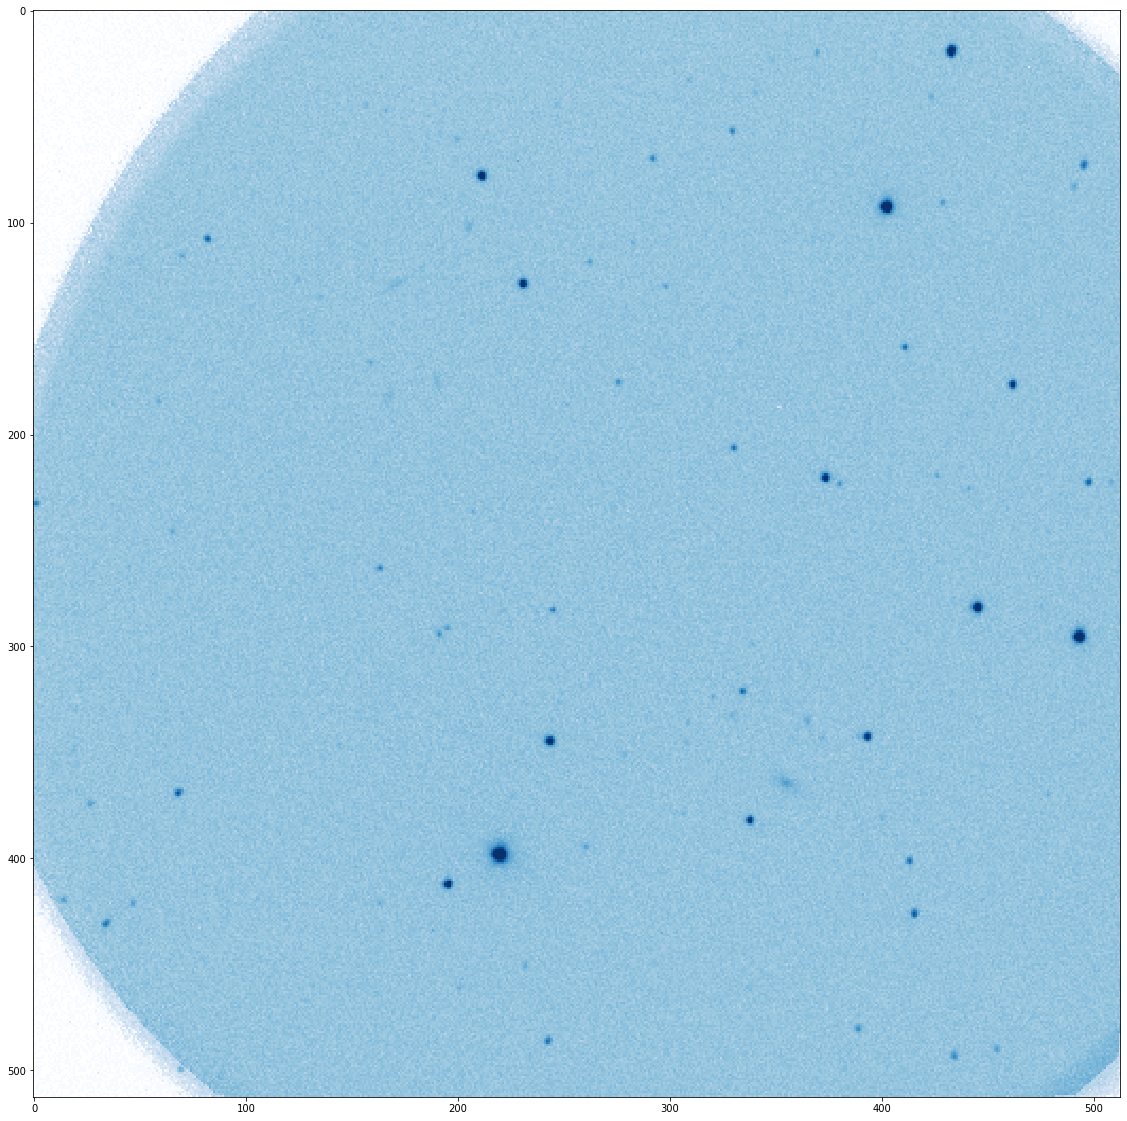

In [17]:
plt.figure(figsize=(20,20))
plt.imshow(data,cmap='Blues',norm=LogNorm(vmin=10, vmax=1000))
plt.savefig('GD356.png')

In [2]:
def foldMeth(timeArray, period):
    phases = []
    for el in timeArray:
        passed = int(el/period)
        leftover = el - (passed*period)
        phase = leftover/period
        phases.append(phase)
    return np.array(phases)

def sineFitLevenbergMarquardt(time, flux, Nslices):
    bestPhases = []
    timeMean = []
    phaseSTD = []
    phases = np.linspace(0, 2*np.pi, 1000)
    chunksF = np.array_split(np.array(flux),Nslices)
    chunksT = np.array_split(np.array(time),Nslices)
    for i in range(Nslices):
        def model(time, phase):
            return 0.01*np.sin(time*(2*np.pi/0.08029870152418028)+phase)
        x0 = np.pi
        def residuals(phase, flux, time):
            return flux - model(time, phase)
        x, flag = leastsq(residuals, x0, args=(chunksF[i], chunksT[i]))

        bestPhases.append(x[0])
        toadd = np.mean(chunksT[i])
        timeMean.append(toadd)
        thisUncert = np.sqrt(2/len(chunksF[i]))*(np.std(chunksF[i])/0.01)
        phaseSTD.append(thisUncert)
    return bestPhases, timeMean,phaseSTD

def sineFitLevenbergMarquardtAmp(time, flux, Nslices):
    bestAmps = []
    timeMean = []
    phaseSTD = []
    phases = np.linspace(0.001, 0.02, 10000)
    chunksF = np.array_split(np.array(flux),Nslices)
    chunksT = np.array_split(np.array(time),Nslices)
    for i in range(Nslices):
        def model(time, phase):
            return phase*np.sin(time*(2*np.pi/0.08029870152418028)+1.4650662155198655)
        x0 = 0.01
        def residuals(phase, flux, time):
            return flux - model(time, phase)
        x, flag = leastsq(residuals, x0, args=(chunksF[i], chunksT[i]))

        bestAmps.append(x[0])
        toadd = np.mean(chunksT[i])
        timeMean.append(toadd)
        thisUncert = np.sqrt(2/len(chunksF[i]))*(np.std(chunksF[i])/0.01)
        phaseSTD.append(thisUncert)
    return bestAmps, timeMean,phaseSTD

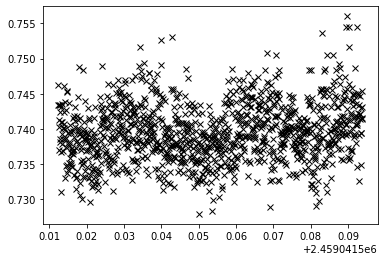

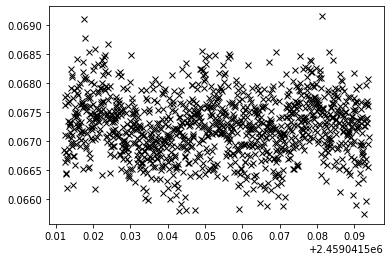

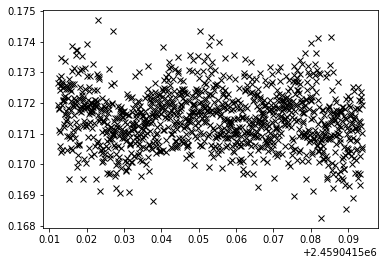

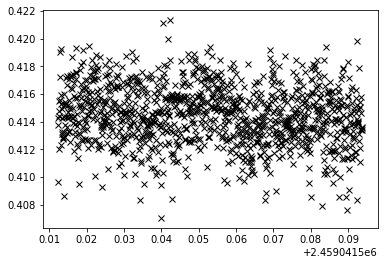

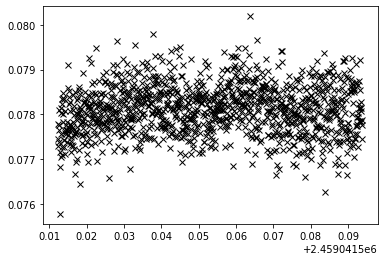

In [81]:
dataLT2 = pd.read_csv('LT/2/Measurements.xls', delimiter='\t')
timeLT2 = dataLT2['BJD_TDB']
revFluxC2 = dataLT2['rel_flux_C2']
revFluxC3 = dataLT2['rel_flux_C3']
revFluxC4 = dataLT2['rel_flux_C4']
revFluxC5 = dataLT2['rel_flux_C5']
revFluxC6 = dataLT2['rel_flux_C6']
plt.plot(timeLT2,revFluxC2,'kx')
plt.show()
plt.plot(timeLT2,revFluxC3,'kx')
plt.show()
plt.plot(timeLT2,revFluxC4,'kx')
plt.show()
plt.plot(timeLT2,revFluxC5,'kx')
plt.show()
plt.plot(timeLT2,revFluxC6,'kx')
plt.show()


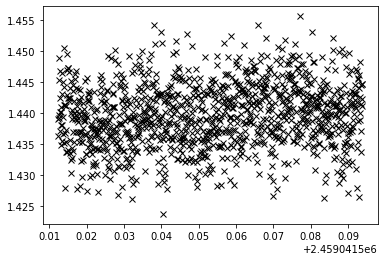

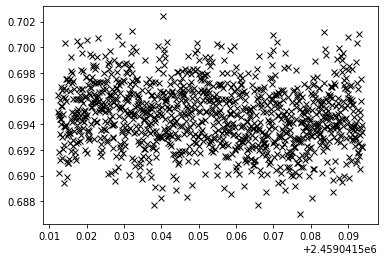

In [86]:
dataLT2 = pd.read_csv('LT/2/MeasurementsComp.xls', delimiter='\t')
timeLT2 = dataLT2['BJD_TDB']
revFluxC2 = dataLT2['rel_flux_C2']
revFluxC3 = dataLT2['rel_flux_C3']

plt.plot(timeLT2,revFluxC2,'kx')
plt.show()
plt.plot(timeLT2,revFluxC3,'kx')
plt.show()

plt.show()


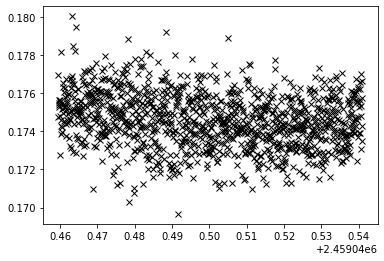

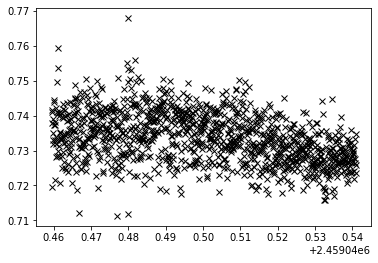

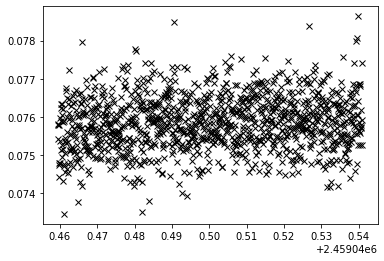

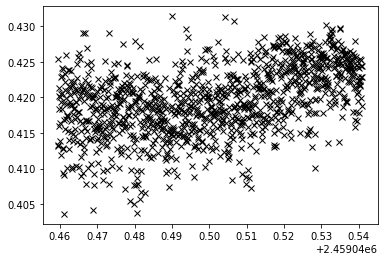

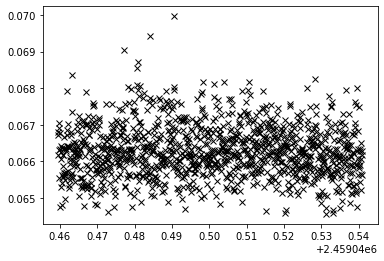

In [82]:
dataLT2 = pd.read_csv('mes2.csv', delimiter=',')
timeLT2 = dataLT2['BJD_TDB']
revFluxC2 = dataLT2['rel_flux_C2']
revFluxC3 = dataLT2['rel_flux_C3']
revFluxC4 = dataLT2['rel_flux_C4']
revFluxC5 = dataLT2['rel_flux_C5']
revFluxC6 = dataLT2['rel_flux_C6']
plt.plot(timeLT2,revFluxC2,'kx')
plt.show()
plt.plot(timeLT2,revFluxC3,'kx')
plt.show()
plt.plot(timeLT2,revFluxC4,'kx')
plt.show()
plt.plot(timeLT2,revFluxC5,'kx')
plt.show()
plt.plot(timeLT2,revFluxC6,'kx')
plt.show()


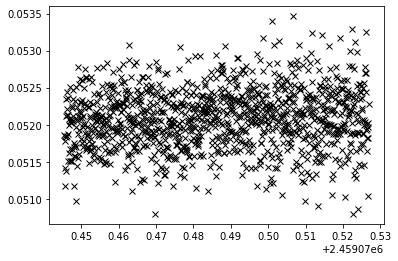

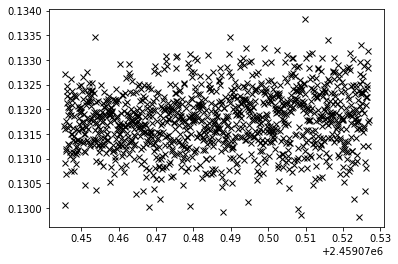

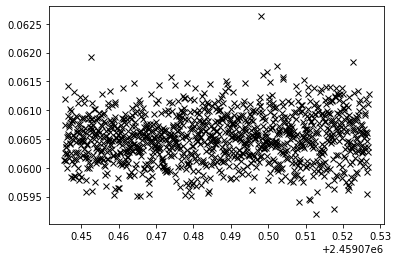

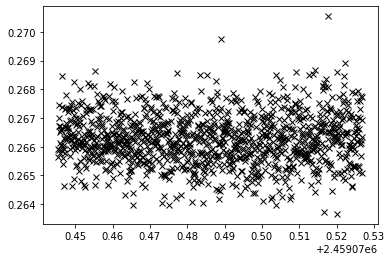

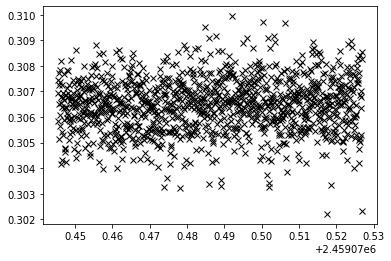

In [85]:
dataLT6 = pd.read_csv('LT/6/Measurements.xls', delimiter='\t')
timeLT6 = dataLT6['JD_UTC']
revFluxC2 = dataLT6['rel_flux_C2']
revFluxC3 = dataLT6['rel_flux_C3']
revFluxC4 = dataLT6['rel_flux_C4']
revFluxC5 = dataLT6['rel_flux_C5']
revFluxC6 = dataLT6['rel_flux_C6']
plt.plot(timeLT6,revFluxC2,'kx')
plt.show()
plt.plot(timeLT6,revFluxC3,'kx')
plt.show()
plt.plot(timeLT6,revFluxC4,'kx')
plt.show()
plt.plot(timeLT6,revFluxC5,'kx')
plt.show()
plt.plot(timeLT6,revFluxC6,'kx')
plt.show()


In [3]:
dataLT = pd.read_csv('mes2.csv', delimiter=',')
timeLT = dataLT['BJD_TDB']
revFluxLT = dataLT['rel_flux_T1']
revFluxLT = (revFluxLT/np.mean(revFluxLT))-1
phasesLT = foldMeth(timeLT,0.08029870250017346)
sortIndi = np.argsort(phasesLT)
phasesLTs = phasesLT[sortIndi]
revFluxLTs = revFluxLT[sortIndi]
dataLT = pd.read_csv('mes2.csv', delimiter=',')
timeLT = dataLT['BJD_TDB']
revFluxLT = dataLT['rel_flux_T1']
revFluxLT = (revFluxLT/np.mean(revFluxLT))-1
timeLTMean = np.nanmean(np.pad(timeLT.astype(float), (0, 10 - timeLT.size%10), mode='constant', constant_values=np.NaN).reshape(-1, 10), axis=1)
fluxLTMean = np.nanmean(np.pad(revFluxLT.astype(float), (0, 10 - revFluxLT.size%10), mode='constant', constant_values=np.NaN).reshape(-1, 10), axis=1)
phasesLTMean = foldMeth(timeLTMean,0.08029870250017346)
sortIndi = np.argsort(phasesLTMean)
phasesLTMean = phasesLTMean[sortIndi]
fluxLTMean = fluxLTMean[sortIndi]


dataLT2 = pd.read_csv('LT/2/Measurements.xls', delimiter='\t')
timeLT2 = dataLT2['BJD_TDB']
revFluxLT2 = dataLT2['rel_flux_T1']
revFluxLT2 = (revFluxLT2/np.mean(revFluxLT2))-1
timeLTMean2 = np.nanmean(np.pad(timeLT2.astype(float), (0, 10 - timeLT2.size%10), mode='constant', constant_values=np.NaN).reshape(-1, 10), axis=1)
fluxLTMean2 = np.nanmean(np.pad(revFluxLT2.astype(float), (0, 10 - revFluxLT2.size%10), mode='constant', constant_values=np.NaN).reshape(-1, 10), axis=1)
phasesLTMean2 = foldMeth(timeLTMean2,0.08029870250017346)
sortIndi = np.argsort(phasesLTMean2)
phasesLTMean2 = phasesLTMean2[sortIndi]
fluxLTMean2 = fluxLTMean2[sortIndi]




dataLT3 = pd.read_csv('LT/3/Measurements031020.xls', delimiter='\t')
timeLT3 = dataLT3['JD_UTC']
revFluxLT3 = dataLT3['rel_flux_T1']
revFluxLT3 = (revFluxLT3/np.mean(revFluxLT3))-1
timeLTMean3 = np.nanmean(np.pad(timeLT3.astype(float), (0, 10 - timeLT3.size%10), mode='constant', constant_values=np.NaN).reshape(-1, 10), axis=1)
fluxLTMean3 = np.nanmean(np.pad(revFluxLT3.astype(float), (0, 10 - revFluxLT3.size%10), mode='constant', constant_values=np.NaN).reshape(-1, 10), axis=1)
phasesLTMean3 = foldMeth(timeLTMean3,0.08029870250017346)
sortIndi = np.argsort(phasesLTMean3)
phasesLTMean3 = phasesLTMean3[sortIndi]
fluxLTMean3 = fluxLTMean3[sortIndi]





dataLT4 = pd.read_csv('LT/4/aligned/Measurements.xls', delimiter='\t')
timeLT4 = dataLT4['JD_UTC']
revFluxLT4 = dataLT4['rel_flux_T1']
revFluxLT4 = (revFluxLT4/np.mean(revFluxLT4))-1
timeLTMean4 = np.nanmean(np.pad(timeLT4.astype(float), (0, 10 - timeLT4.size%10), mode='constant', constant_values=np.NaN).reshape(-1, 10), axis=1)
fluxLTMean4 = np.nanmean(np.pad(revFluxLT4.astype(float), (0, 10 - revFluxLT4.size%10), mode='constant', constant_values=np.NaN).reshape(-1, 10), axis=1)
phasesLTMean4 = foldMeth(timeLTMean4,0.08029870250017346)
sortIndi = np.argsort(phasesLTMean4)
phasesLTMean4 = phasesLTMean4[sortIndi]
fluxLTMean4 = fluxLTMean4[sortIndi]


dataLT5 = pd.read_csv('LT/5/Measurements.xls', delimiter='\t')
timeLT5 = dataLT5['JD_UTC']
revFluxLT5 = dataLT5['rel_flux_T1']
revFluxLT5 = (revFluxLT5/np.mean(revFluxLT5))-1
timeLTMean5 = np.nanmean(np.pad(timeLT5.astype(float), (0, 10 - timeLT5.size%10), mode='constant', constant_values=np.NaN).reshape(-1, 10), axis=1)
fluxLTMean5 = np.nanmean(np.pad(revFluxLT5.astype(float), (0, 10 - revFluxLT5.size%10), mode='constant', constant_values=np.NaN).reshape(-1, 10), axis=1)
phasesLTMean5 = foldMeth(timeLTMean5,0.08029870250017346)
sortIndi = np.argsort(phasesLTMean5)
phasesLTMean5 = phasesLTMean5[sortIndi]
fluxLTMean5 = fluxLTMean5[sortIndi]



dataLT6 = pd.read_csv('LT/6/Measurements.xls', delimiter='\t')
timeLT6 = dataLT6['JD_UTC']
revFluxLT6 = dataLT6['rel_flux_T1']
revFluxLT6 = (revFluxLT6/np.mean(revFluxLT6))-1
timeLTMean6 = np.nanmean(np.pad(timeLT6.astype(float), (0, 10 - timeLT6.size%10), mode='constant', constant_values=np.NaN).reshape(-1, 10), axis=1)
fluxLTMean6 = np.nanmean(np.pad(revFluxLT6.astype(float), (0, 10 - revFluxLT6.size%10), mode='constant', constant_values=np.NaN).reshape(-1, 10), axis=1)
phasesLTMean6 = foldMeth(timeLTMean6,0.08029870250017346)
sortIndi = np.argsort(phasesLTMean6)
phasesLTMean6 = phasesLTMean6[sortIndi]
fluxLTMean6 = fluxLTMean6[sortIndi]


dataLT7 = pd.read_csv('LT/7/Measurements.xls', delimiter='\t')
timeLT7 = dataLT7['JD_UTC']
revFluxLT7 = dataLT7['rel_flux_T1']
revFluxLT7 = (revFluxLT7/np.mean(revFluxLT7))-1
timeLTMean7 = np.nanmean(np.pad(timeLT7.astype(float), (0, 10 - timeLT7.size%10), mode='constant', constant_values=np.NaN).reshape(-1, 10), axis=1)
fluxLTMean7 = np.nanmean(np.pad(revFluxLT7.astype(float), (0, 10 - revFluxLT7.size%10), mode='constant', constant_values=np.NaN).reshape(-1, 10), axis=1)
phasesLTMean7 = foldMeth(timeLTMean7,0.08029870250017346)
sortIndi = np.argsort(phasesLTMean7)
phasesLTMean7 = phasesLTMean7[sortIndi]
fluxLTMean7 = fluxLTMean7[sortIndi]

JJDF = pd.read_csv('LT/JJ/gd356_aug15.lc1', delim_whitespace=True,names={'Time', 'Flux'})
JJTimes = (JJDF['Time'].to_numpy()/60/60/24)+2459076.6992445
JJFlux = JJDF['Flux'].to_numpy()
JJPhases = foldMeth(JJTimes,0.08029870250017346)


timeStack = np.vstack((timeLT,timeLT2))
timeStack = np.vstack((timeStack,timeLT3))
#timeStack = np.vstack((timeStack,timeLT4))
timeStack = np.vstack((timeStack,timeLT5))
timeStack = np.vstack((timeStack,timeLT6))
timeStack = np.vstack((timeStack,timeLT7))
fluxStack = np.vstack((revFluxLT,revFluxLT2))
fluxStack = np.vstack((fluxStack, revFluxLT3))
#fluxStack = np.vstack((fluxStack, revFluxLT4))
fluxStack = np.vstack((fluxStack, revFluxLT5))
fluxStack = np.vstack((fluxStack, revFluxLT6))
fluxStack = np.vstack((fluxStack, revFluxLT7))
timeAll = np.append(timeLT,timeLT2)
timeAll = np.append(timeAll,timeLT3)
timeAll = np.append(timeAll,timeLT5)
timeAll = np.append(timeAll,timeLT6)
timeAll = np.append(timeAll,timeLT7)
fluxAll = np.append(revFluxLT,revFluxLT2)
fluxAll = np.append(fluxAll,revFluxLT3)
fluxAll = np.append(fluxAll,revFluxLT5)
fluxAll = np.append(fluxAll,revFluxLT6)
fluxAll = np.append(fluxAll,revFluxLT7)

In [20]:
sineFitLevenbergMarquardt(timeLT, revFluxLT, 1)

([1.4650662155198655], [2459040.4978964045], [0.043621619378586635])

In [26]:
sineFitLevenbergMarquardtAmp(timeLT, revFluxLT, 1)

([0.005339168198064576], [2459040.4978964045], [0.043621619378586635])

In [4]:
from sklearn.metrics import mean_squared_error
def sineFit(time, flux, Nslices):
    bestPhases = []
    timeMean = []
    phaseSTD = []
    phases = np.linspace(0, 2*np.pi, 1000)
    chunksF = flux
    chunksT = time
    for i in range(Nslices):
        minMSE = 9999999  
        for phase in phases:
            model = averageAmp[i]*np.sin(chunksT[i]*(2*np.pi/0.08029867)+phase)
            mse = mean_squared_error(model, chunksF[i])
            if mse < minMSE:
                minMSE = mse
                bestFitPhase = phase
        bestPhases.append(bestFitPhase)
        toadd = np.mean(chunksT[i])
        timeMean.append(toadd)
        thisUncert = np.sqrt(2/len(chunksF[i]))*(np.std(chunksF[i])/averageAmp[i])
        phaseSTD.append(thisUncert)
    return bestPhases, timeMean,phaseSTD


def sineFitAmp(time, flux, Nslices,phaseIn):
    bestAmp = []
    timeMean = []
    phaseSTD = []
    phases = np.linspace(0.001, 0.02, 1000)
    chunksF = flux
    chunksT = time
    for i in range(Nslices):
        minMSE = 9999999  
        for phase in phases:
            model = phase*np.sin(time*(2*np.pi/0.08029867)+phaseIn)
            mse = mean_squared_error(model, flux)
            if mse < minMSE:
                minMSE = mse
                bestFitPhase = phase
        bestAmp.append(bestFitPhase)
        toadd = np.mean(time)
        timeMean.append(toadd)
        thisUncert = np.sqrt(2/len(flux))*(np.std(flux)/0.01)
        phaseSTD.append(thisUncert)
    return bestAmp, timeMean,phaseSTD


def sineFit2D(time,flux):
    twoDStack = []
    oneDStack = []
    phases = np.linspace(0,2*np.pi, 400)
    amps = np.linspace(0.002,0.01,400)
    count = 0
    minmse = 999999
    for el in phases:
        for amp in amps:
            model = amp*np.sin(time*(2*np.pi/0.08029867)+el)
            mse = mean_squared_error(model, flux)
            oneDStack.append(mse)
            if mse < minmse:
                bestPhase = el
                bestAmp = amp
                minmse=mse
        if count == 0:
            twoDStack = oneDStack
            count = 1
        else:
            twoDStack = np.vstack((twoDStack, oneDStack))
        oneDStack = []
    return twoDStack,bestPhase,bestAmp, minmse


def sineFit2DJJ(time,flux):
    twoDStack = []
    oneDStack = []
    phases = np.linspace(0,2*np.pi, 400)
    amps = np.linspace(0.01,0.02,400)
    count = 0
    minmse = 999999
    for el in phases:
        for amp in amps:
            model = amp*np.sin(time*(2*np.pi/0.08029867)+el)
            mse = mean_squared_error(model, flux)
            oneDStack.append(mse)
            if mse < minmse:
                bestPhase = el
                bestAmp = amp
                minmse=mse
        if count == 0:
            twoDStack = oneDStack
            count = 1
        else:
            twoDStack = np.vstack((twoDStack, oneDStack))
        oneDStack = []
    return twoDStack,bestPhase,bestAmp, minmse
            
            
def findIdx(array,value):
    count = 0
    for el in array:
        if el == value:
            index = count
        count = count + 1
    return index
#print(sineFit(timeStack,fluxStack,5))

#print('====')
#print(sineFitAmp(timeLT-2457000, revFluxLT,1, 1.8050792624229641)[0])
#print(sineFitAmp(timeLT2-2457000, revFluxLT2,1, 1.7044476659115793)[0])
#print(sineFitAmp(timeLT3-2457000, revFluxLT3,1, 1.3773949772495788)[0])
#print(sineFitAmp(timeLT5-2457000, revFluxLT5,1, 1.4214213007233096)[0])
#print(sineFitAmp(timeLT6-2457000, revFluxLT6,1, 1.5912371198362716)[0])

#averageAmp = []
#averageAmp.append(sineFitAmp(timeLT-2457000, revFluxLT,1, 1.8050792624229641)[0])
#averageAmp.append(sineFitAmp(timeLT2-2457000, revFluxLT2,1, 1.7044476659115793)[0])
#averageAmp.append(sineFitAmp(timeLT3-2457000, revFluxLT3,1, 1.3773949772495788)[0])
#averageAmp.append(sineFitAmp(timeLT5-2457000, revFluxLT5,1, 1.4214213007233096)[0])
#averageAmp.append(sineFitAmp(timeLT6-2457000, revFluxLT6,1, 1.5912371198362716)[0])
#print(np.mean(averageAmp))



def sineFit1DPhase(time,flux,amp):
    phases = np.linspace(0,1, 400)
    amps = amp
    count = 0
    minmse = 999999
    for el in phases:
        model = amps*np.sin(time*(2*np.pi/0.08029867)+el)
        mse = mean_squared_error(model, flux)
        if mse < minmse:
            bestPhase = el
            minmse=mse
    return bestPhase

def sineFit1DPhaseJJ(time,flux,amp):
    phases = np.linspace(1,2, 400)
    amps = amp
    count = 0
    minmse = 999999
    for el in phases:
        model = amps*np.sin(time*(2*np.pi/0.08029867)+el)
        mse = mean_squared_error(model, flux)
        if mse < minmse:
            bestPhase = el
            minmse=mse
    return bestPhase


def sineFit1DAmp(time,flux,phase):
    amps = np.linspace(0.006,0.011, 400)
    phases = phase
    count = 0
    minmse = 999999
    for el in amps:
        model = el*np.sin(time*(2*np.pi/0.08029867)+phases)
        mse = mean_squared_error(model, flux)
        if mse < minmse:
            bestAmp = el
            minmse=mse
    return bestAmp

def sineFit1DAmpJJ(time,flux,phase):
    amps = np.linspace(0.01,0.016, 400)
    phases = phase
    count = 0
    minmse = 999999
    for el in amps:
        model = el*np.sin(time*(2*np.pi/0.08029867)+phases)
        mse = mean_squared_error(model, flux)
        if mse < minmse:
            bestAmp = el
            minmse=mse
    return bestAmp



def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array(data)
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, m-h, m+h

In [12]:
print(findIdx(np.linspace(0,2*np.pi, 400), 0.5354092742960048 ))
print(findIdx(np.linspace(0,2*np.pi, 400), 0.44092528471435694 ) )
print(findIdx(np.linspace(0,2*np.pi, 400), 0.11023132117858923 ) )
print(findIdx(np.linspace(0,2*np.pi, 400), 0.1574733159694132  ))
print(findIdx(np.linspace(0,2*np.pi, 400), 0.3306939635357677  ))
print('amps==============')
print(findIdx(np.linspace(0.002,0.01,400), 0.007513784461152882 ))
print(findIdx(np.linspace(0.002,0.01,400), 0.008977443609022556 ) )
print(findIdx(np.linspace(0.002,0.01,400), 0.006932330827067669 ) )
print(findIdx(np.linspace(0.002,0.01,400), 0.009619047619047619  ))
print(findIdx(np.linspace(0.002,0.01,400), 0.008375939849624061  ))

34
28
7
10
21
amps==============
275
348
246
380
318


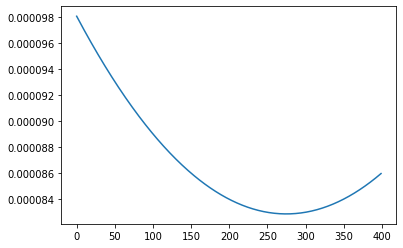

In [16]:
plt.plot(twoDStack1[34])

In [5]:
twoDStack1,bestphase1,bestamp1,minmse1 = sineFit2D(timeLT,revFluxLT)
twoDStack2,bestphase2,bestamp2,minmse2 = sineFit2D(timeLT2,revFluxLT2)
twoDStack3,bestphase3,bestamp3,minmse3 = sineFit2D(timeLT3,revFluxLT3)
twoDStack5,bestphase5,bestamp5,minmse5 = sineFit2D(timeLT5,revFluxLT5)
twoDStack6,bestphase6,bestamp6,minmse6 = sineFit2D(timeLT6,revFluxLT6)
twoDStack7,bestphase7,bestamp7,minmse7 = sineFit2D(timeLT7,revFluxLT7)

In [16]:
twoDStack7,bestphase7,bestamp7,minmse7 = sineFit2D(timeLT7-2457000,revFluxLT7) 


In [21]:
twoDStackJJ,bestphaseJJ,bestampJJ,minmseJJ = sineFit2DJJ(JJTimes-2457000,JJFlux) 

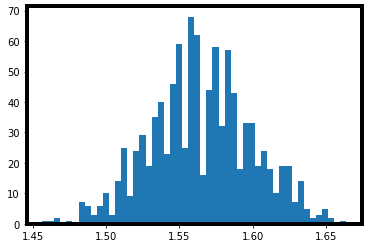

0.03501621751558392


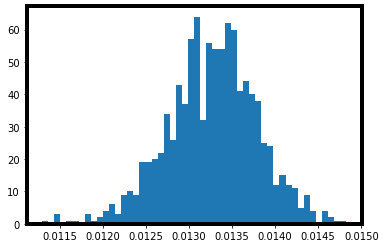

0.0005220725863358065


In [35]:
JJTimesM = JJTimes-2457000
phasesJJ = []
sortIdx = np.linspace(0,len(JJTimesM)-1, len(JJTimesM))
for i in range(1000):
    sortIdxScr = bootstrap(sortIdx, 1)
    sortIdxScr = sortIdxScr.flatten()
    sortIdxScr = np.array(sortIdxScr, dtype=int)
    timeLTScr = JJTimesM[sortIdxScr]
    revFluxLTScr = JJFlux[sortIdxScr]
    phase = sineFit1DPhaseJJ(timeLTScr,revFluxLTScr,0.013283208020050126)
    phasesJJ.append(phase)
    
plt.hist(phasesJJ, bins=50)
plt.show()
print(np.std(phasesJJ))


ampsJJ = []
sortIdx = np.linspace(0,len(JJTimesM)-1, len(JJTimesM))
for i in range(1000):
    sortIdxScr = bootstrap(sortIdx, 1)
    sortIdxScr = sortIdxScr.flatten()
    sortIdxScr = np.array(sortIdxScr, dtype=int)
    timeLTScr = JJTimesM[sortIdxScr]
    revFluxLTScr = JJFlux[sortIdxScr]
    amp = sineFit1DAmpJJ(timeLTScr,revFluxLTScr,1.5589858280971907 )
    ampsJJ.append(amp)
    
plt.hist(ampsJJ, bins=50)
plt.show()
print(np.std(ampsJJ))

In [6]:
twoDStackAll,bestphaseAll,bestampAll,minmseAll = sineFit2D(timeAll,fluxAll)

In [6]:
print(bestphase6,bestphase7)

0.3306939635357677 0.22046264235717847


In [39]:
phases1 = []
sortIdx = np.linspace(0,len(timeLT)-1, len(timeLT))
for i in range(1000):
    sortIdxScr = bootstrap(sortIdx, 1)
    sortIdxScr = sortIdxScr.flatten()
    timeLTScr = timeLT[sortIdxScr]
    revFluxLTScr = revFluxLT[sortIdxScr]
    phase = sineFit1DPhase(timeLTScr,revFluxLTScr,0.007513784461152882)
    phases1.append(phase)

0.05135344975416214

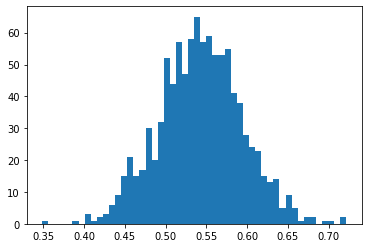

In [42]:
plt.hist(phases1, bins=50)
np.std(phases1)

0.0003767098695058699

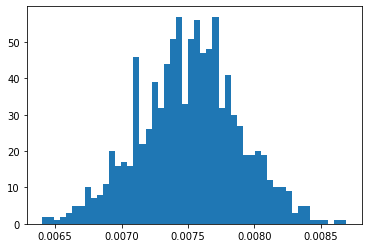

In [47]:
amps1 = []
sortIdx = np.linspace(0,len(timeLT)-1, len(timeLT))
for i in range(1000):
    sortIdxScr = bootstrap(sortIdx, 1)
    sortIdxScr = sortIdxScr.flatten()
    timeLTScr = timeLT[sortIdxScr]
    revFluxLTScr = revFluxLT[sortIdxScr]
    amp = sineFit1DAmp(timeLTScr,revFluxLTScr,0.5354092742960048 )
    amps1.append(amp)
    
plt.hist(amps1, bins=50)
np.std(amps1)

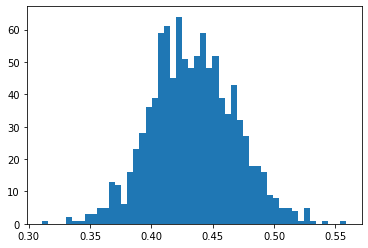

0.034959326855721735


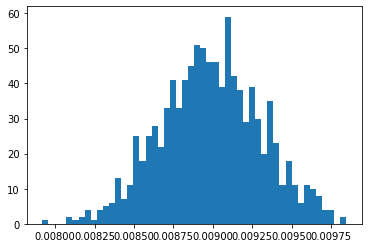

0.00031901547107622774


In [49]:
phases2 = []
sortIdx = np.linspace(0,len(timeLT2)-1, len(timeLT2))
for i in range(1000):
    sortIdxScr = bootstrap(sortIdx, 1)
    sortIdxScr = sortIdxScr.flatten()
    timeLTScr = timeLT2[sortIdxScr]
    revFluxLTScr = revFluxLT2[sortIdxScr]
    phase = sineFit1DPhase(timeLTScr,revFluxLTScr,0.008977443609022556)
    phases2.append(phase)
    
plt.hist(phases2, bins=50)
plt.show()
print(np.std(phases2))


amps2 = []
sortIdx = np.linspace(0,len(timeLT2)-1, len(timeLT2))
for i in range(1000):
    sortIdxScr = bootstrap(sortIdx, 1)
    sortIdxScr = sortIdxScr.flatten()
    timeLTScr = timeLT2[sortIdxScr]
    revFluxLTScr = revFluxLT2[sortIdxScr]
    amp = sineFit1DAmp(timeLTScr,revFluxLTScr,0.44092528471435694 )
    amps2.append(amp)
    
plt.hist(amps2, bins=50)
plt.show()
print(np.std(amps2))

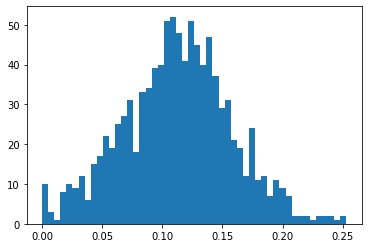

0.044762833094971484


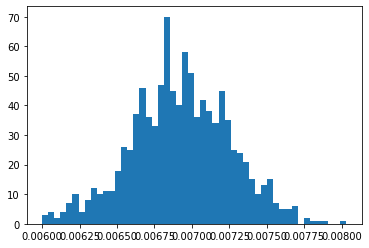

0.00033127966211922563


In [50]:
phases3 = []
sortIdx = np.linspace(0,len(timeLT3)-1, len(timeLT3))
for i in range(1000):
    sortIdxScr = bootstrap(sortIdx, 1)
    sortIdxScr = sortIdxScr.flatten()
    timeLTScr = timeLT3[sortIdxScr]
    revFluxLTScr = revFluxLT3[sortIdxScr]
    phase = sineFit1DPhase(timeLTScr,revFluxLTScr,0.006932330827067669)
    phases3.append(phase)
    
plt.hist(phases3, bins=50)
plt.show()
print(np.std(phases3))


amps3 = []
sortIdx = np.linspace(0,len(timeLT3)-1, len(timeLT3))
for i in range(1000):
    sortIdxScr = bootstrap(sortIdx, 1)
    sortIdxScr = sortIdxScr.flatten()
    timeLTScr = timeLT3[sortIdxScr]
    revFluxLTScr = revFluxLT3[sortIdxScr]
    amp = sineFit1DAmp(timeLTScr,revFluxLTScr,0.11023132117858923 )
    amps3.append(amp)
    
plt.hist(amps3, bins=50)
plt.show()
print(np.std(amps3))

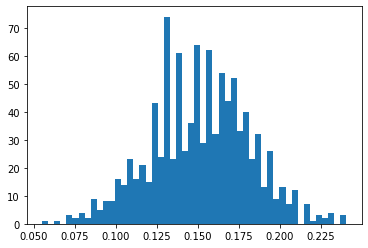

0.030074342093367852


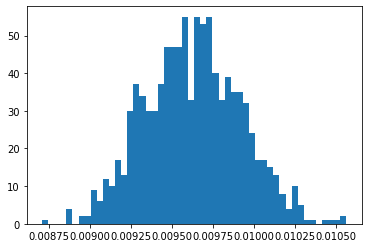

0.00028944037364354115


In [51]:
phases5 = []
sortIdx = np.linspace(0,len(timeLT5)-1, len(timeLT5))
for i in range(1000):
    sortIdxScr = bootstrap(sortIdx, 1)
    sortIdxScr = sortIdxScr.flatten()
    timeLTScr = timeLT5[sortIdxScr]
    revFluxLTScr = revFluxLT5[sortIdxScr]
    phase = sineFit1DPhase(timeLTScr,revFluxLTScr,0.009619047619047619)
    phases5.append(phase)
    
plt.hist(phases5, bins=50)
plt.show()
print(np.std(phases5))


amps5 = []
sortIdx = np.linspace(0,len(timeLT5)-1, len(timeLT5))
for i in range(1000):
    sortIdxScr = bootstrap(sortIdx, 1)
    sortIdxScr = sortIdxScr.flatten()
    timeLTScr = timeLT5[sortIdxScr]
    revFluxLTScr = revFluxLT5[sortIdxScr]
    amp = sineFit1DAmp(timeLTScr,revFluxLTScr,0.1574733159694132 )
    amps5.append(amp)
    
plt.hist(amps5, bins=50)
plt.show()
print(np.std(amps5))

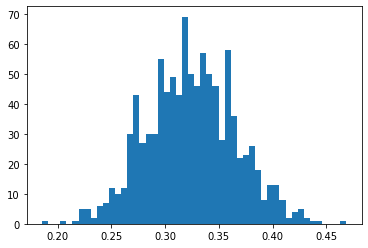

0.0413788939313816


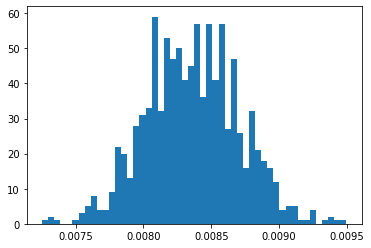

0.00034243485527777007


In [52]:
phases6 = []
sortIdx = np.linspace(0,len(timeLT6)-1, len(timeLT6))
for i in range(1000):
    sortIdxScr = bootstrap(sortIdx, 1)
    sortIdxScr = sortIdxScr.flatten()
    timeLTScr = timeLT6[sortIdxScr]
    revFluxLTScr = revFluxLT6[sortIdxScr]
    phase = sineFit1DPhase(timeLTScr,revFluxLTScr,0.008375939849624061)
    phases6.append(phase)
    
plt.hist(phases6, bins=50)
plt.show()
print(np.std(phases6))


amps6 = []
sortIdx = np.linspace(0,len(timeLT6)-1, len(timeLT6))
for i in range(1000):
    sortIdxScr = bootstrap(sortIdx, 1)
    sortIdxScr = sortIdxScr.flatten()
    timeLTScr = timeLT6[sortIdxScr]
    revFluxLTScr = revFluxLT6[sortIdxScr]
    amp = sineFit1DAmp(timeLTScr,revFluxLTScr,0.3306939635357677 )
    amps6.append(amp)
    
plt.hist(amps6, bins=50)
plt.show()
print(np.std(amps6))

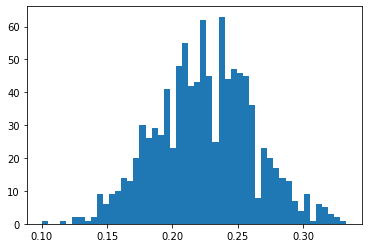

0.03735358256027288


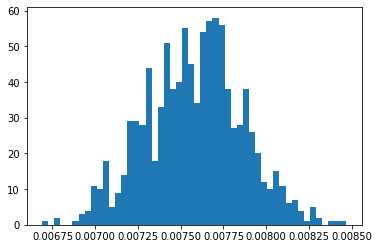

0.00028159961019625984


In [9]:
phases7 = []
sortIdx = np.linspace(0,len(timeLT7)-1, len(timeLT7))
for i in range(1000):
    sortIdxScr = bootstrap(sortIdx, 1)
    sortIdxScr = sortIdxScr.flatten()
    timeLTScr = timeLT7[sortIdxScr]
    revFluxLTScr = revFluxLT7[sortIdxScr]
    phase = sineFit1DPhase(timeLTScr,revFluxLTScr,0.007573934837092732)
    phases7.append(phase)
    
plt.hist(phases7, bins=50)
plt.show()
print(np.std(phases7))


amps7 = []
sortIdx = np.linspace(0,len(timeLT7)-1, len(timeLT7))
for i in range(1000):
    sortIdxScr = bootstrap(sortIdx, 1)
    sortIdxScr = sortIdxScr.flatten()
    timeLTScr = timeLT7[sortIdxScr]
    revFluxLTScr = revFluxLT7[sortIdxScr]
    amp = sineFit1DAmp(timeLTScr,revFluxLTScr,0.22046264235717847  )
    amps7.append(amp)
    
plt.hist(amps7, bins=50)
plt.show()
print(np.std(amps7))

In [8]:
print(bestphase1,bestamp1)
print(bestphase2,bestamp2)
print(bestphase3,bestamp3)
print(bestphase5,bestamp5)
print(bestphase6,bestamp6)
print(bestphase7,bestamp7)
#print(bestphaseAll,bestampAll)

0.36218862672965035 0.007513784461152882
0.44092528471435694 0.008977443609022556
0.11023132117858923 0.006932330827067669
0.1574733159694132 0.009619047619047619
0.3306939635357677 0.008375939849624061
0.22046264235717847 0.007573934837092732


In [60]:
print(0.5354092742960048,'+/-',2*np.std(phases1))
print(0.44092528471435694 ,'+/-',2*np.std(phases2))
print(0.11023132117858923,'+/-',2*np.std(phases3))
print(0.1574733159694132,'+/-',2*np.std(phases5))
print(0.3306939635357677,'+/-',2*np.std(phases6))



0.5354092742960048 +/- 0.10270689950832428
0.44092528471435694 +/- 0.06991865371144347
0.11023132117858923 +/- 0.08952566618994297
0.1574733159694132 +/- 0.060148684186735704
0.3306939635357677 +/- 0.0827577878627632


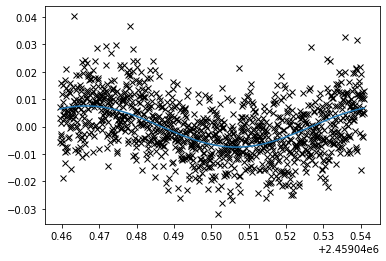

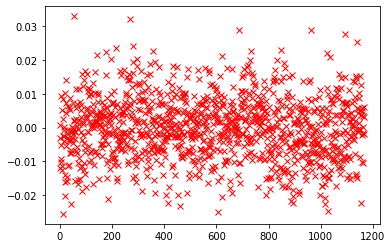

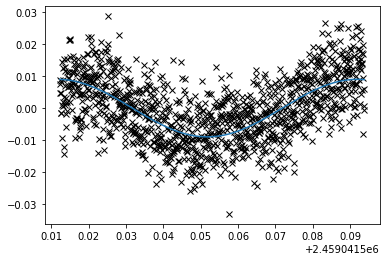

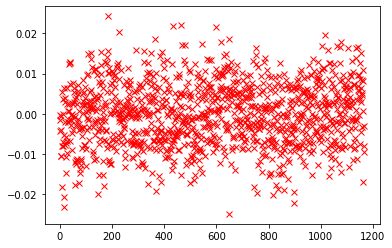

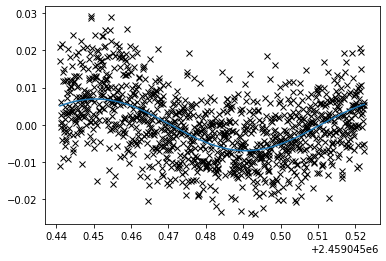

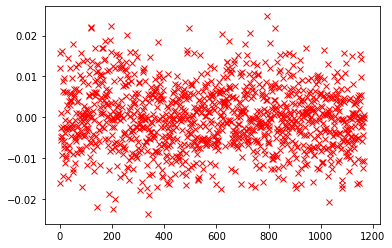

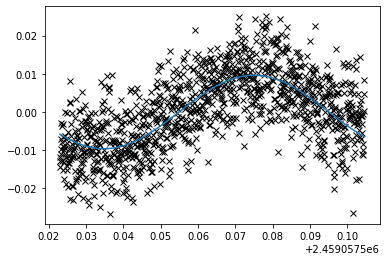

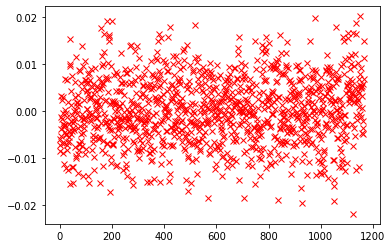

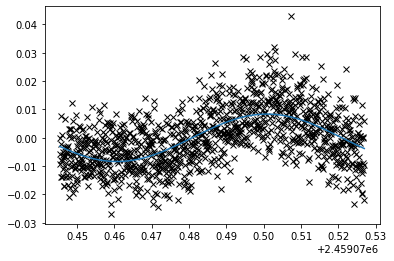

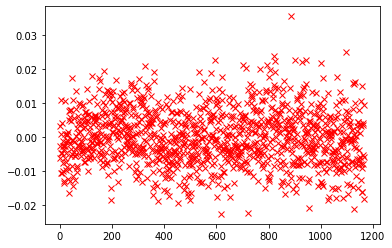

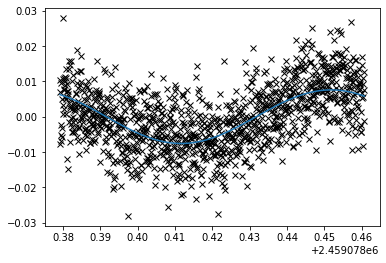

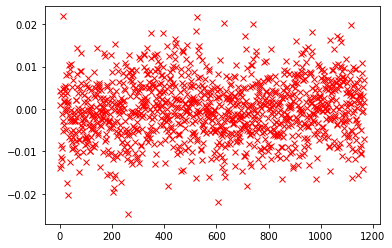

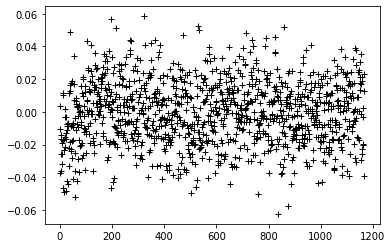

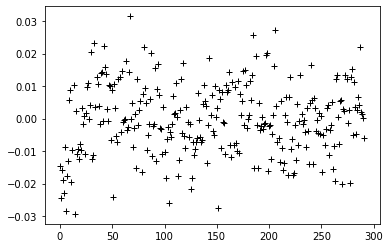

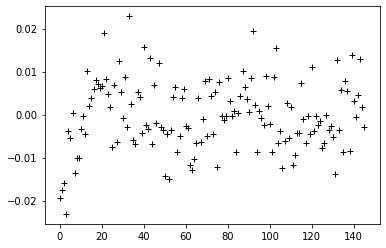

0.006286463368699831


In [9]:
plt.plot(timeLT,revFluxLT, 'kx')
plt.plot(timeLT, 0.007513784461152882*np.sin(timeLT*(2*np.pi/0.08029867)+0.5354092742960048))
residuals1 = revFluxLT-0.007513784461152882*np.sin(timeLT*(2*np.pi/0.08029867)+0.5354092742960048)
plt.show()
plt.plot(residuals1,'rx')
plt.show()
plt.plot(timeLT2,revFluxLT2, 'kx')
plt.plot(timeLT2, 0.008977443609022556*np.sin(timeLT2*(2*np.pi/0.08029867)+0.44092528471435694))
residuals2 = revFluxLT2 - 0.008977443609022556*np.sin(timeLT2*(2*np.pi/0.08029867)+0.44092528471435694)
plt.show()
plt.plot(residuals2,'rx')
plt.show()
plt.plot(timeLT3,revFluxLT3, 'kx')
plt.plot(timeLT3, 0.006932330827067669*np.sin(timeLT3*(2*np.pi/0.08029867)+0.11023132117858923))
residuals3 = revFluxLT3 - 0.006932330827067669*np.sin(timeLT3*(2*np.pi/0.08029867)+0.11023132117858923)
plt.show()
plt.plot(residuals3,'rx')
plt.show()
plt.plot(timeLT5,revFluxLT5, 'kx')
plt.plot(timeLT5, 0.009619047619047619*np.sin(timeLT5*(2*np.pi/0.08029867)+0.1574733159694132))
residuals5 = revFluxLT5 - 0.009619047619047619*np.sin(timeLT5*(2*np.pi/0.08029867)+0.1574733159694132)
plt.show()
plt.plot(residuals5,'rx')
plt.show()
plt.plot(timeLT6,revFluxLT6, 'kx')
plt.plot(timeLT6, 0.008375939849624061*np.sin(timeLT6*(2*np.pi/0.08029867)+0.3306939635357677))
residuals6 = revFluxLT6 - 0.008375939849624061*np.sin(timeLT6*(2*np.pi/0.08029867)+0.3306939635357677)
plt.show()
plt.plot(residuals6,'rx')
plt.show()
plt.plot(timeLT7,revFluxLT7, 'kx')
plt.plot(timeLT7, 0.007573934837092732*np.sin(timeLT7*(2*np.pi/0.08029867)+0.22046264235717847))
residuals7 = revFluxLT7 - 0.007573934837092732*np.sin(timeLT7*(2*np.pi/0.08029867)+0.22046264235717847)
plt.show()
plt.plot(residuals7,'rx')
plt.show()

resSum = np.array(residuals1+residuals2+residuals3+residuals5+residuals6+residuals7)
plt.plot(resSum, 'k+')
plt.show()
resSumMean = np.mean(resSum.reshape(-1, 4), axis=1)
plt.plot(resSumMean, 'k+')
plt.show()
resSumMean = np.mean(resSum.reshape(-1, 8), axis=1)
plt.plot(resSumMean, 'k+')
plt.show()

print(np.mean((np.abs(residuals1)+np.abs(residuals2)+np.abs(residuals3)+np.abs(residuals5)+np.abs(residuals6)+np.abs(residuals7))/6))


#needs to be on the samephase

In [10]:
1/0.006286463368699831

159.07195212159812

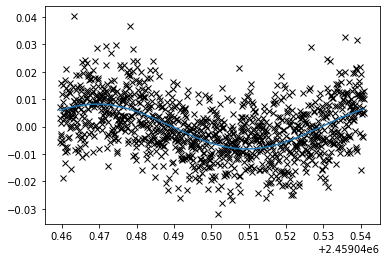

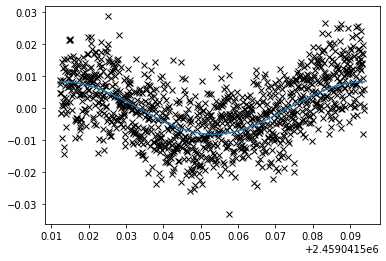

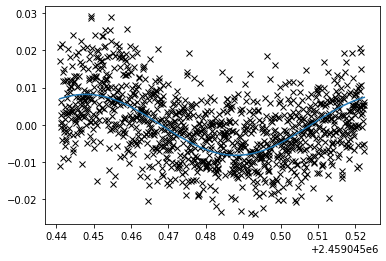

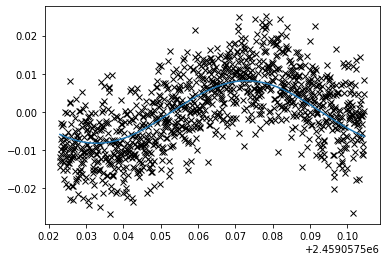

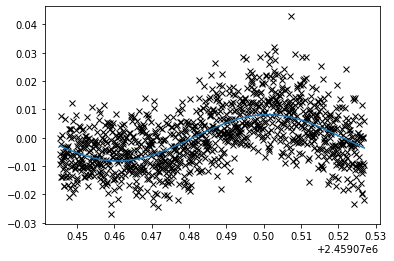

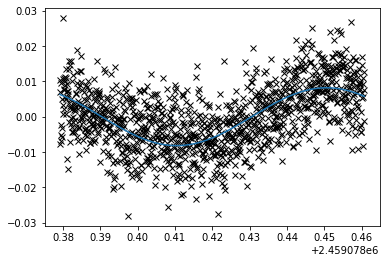

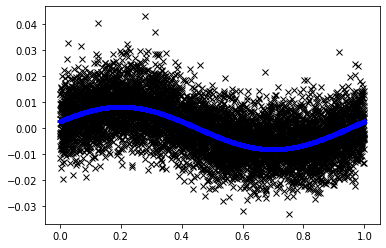

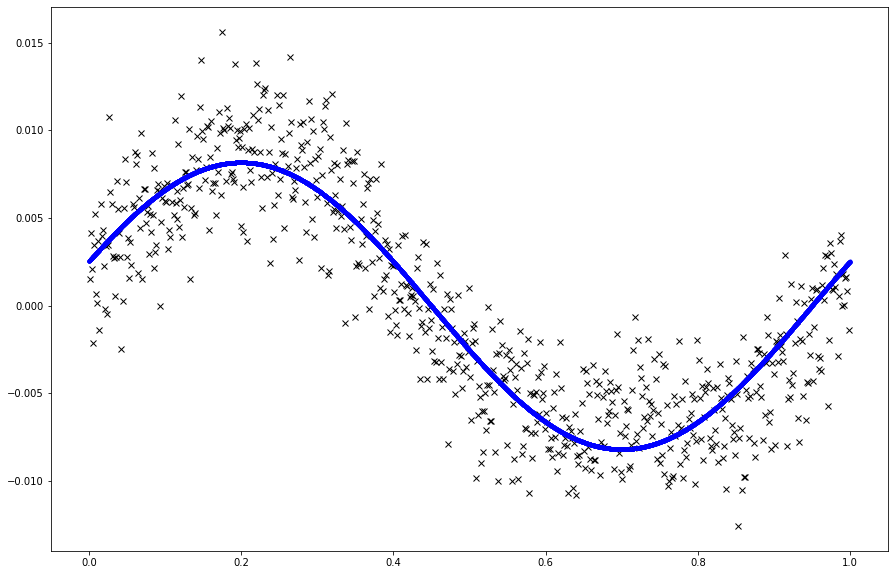

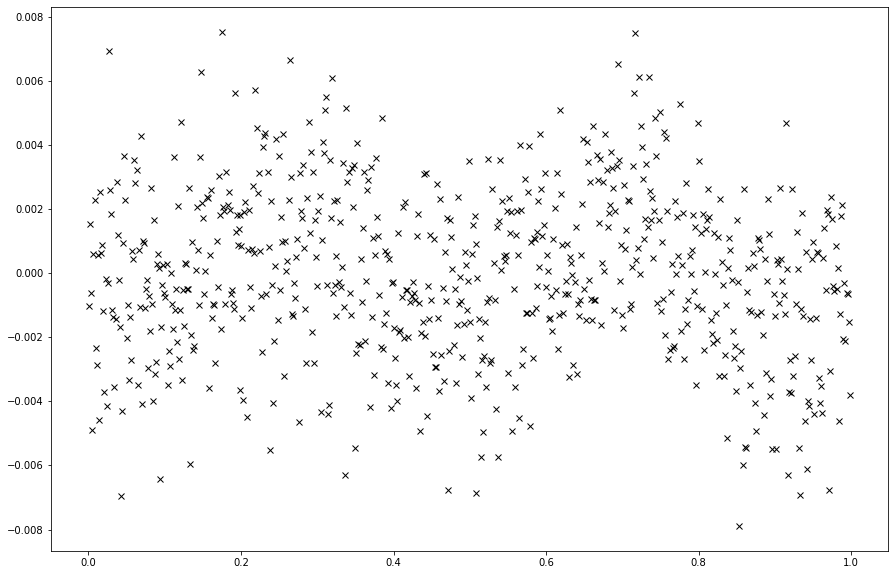

In [11]:
plt.plot(timeLT,revFluxLT, 'kx')
plt.plot(timeLT, 0.008175438596491228*np.sin(timeLT*(2*np.pi/0.08029867)+0.3149466319388264))
plt.show()




plt.plot(timeLT2,revFluxLT2, 'kx')
plt.plot(timeLT2, 0.008175438596491228*np.sin(timeLT2*(2*np.pi/0.08029867)+0.3149466319388264))
plt.show()



plt.plot(timeLT3,revFluxLT3, 'kx')
plt.plot(timeLT3, 0.008175438596491228*np.sin(timeLT3*(2*np.pi/0.08029867)+0.3149466319388264))
plt.show()




plt.plot(timeLT5,revFluxLT5, 'kx')
plt.plot(timeLT5, 0.008175438596491228*np.sin(timeLT5*(2*np.pi/0.08029867)+0.3149466319388264))
plt.show()





plt.plot(timeLT6,revFluxLT6, 'kx')
plt.plot(timeLT6, 0.008175438596491228*np.sin(timeLT6*(2*np.pi/0.08029867)+0.3149466319388264))
plt.show()

plt.plot(timeLT7,revFluxLT7, 'kx')
plt.plot(timeLT7, 0.008175438596491228*np.sin(timeLT7*(2*np.pi/0.08029867)+0.3149466319388264))
plt.show()



phasesAll = foldMeth(timeAll,0.08029867)
sortInd = np.argsort(phasesAll)
phasesAllSorted = phasesAll[sortInd]
fluxAllSorted = fluxAll[sortInd]
timeAllSorted = timeAll[sortInd]
plt.plot(phasesAllSorted,fluxAllSorted,'kx')
plt.plot(phasesAllSorted,0.008175438596491228*np.sin(timeAllSorted*(2*np.pi/0.08029867)+0.3149466319388264), '.b')
plt.show()

plt.figure(figsize=(15,10))
phasesAllSortedMean = np.mean(phasesAllSorted[:-8].reshape(-1, 10), axis=1)
fluxAllSortedMean = np.mean(fluxAllSorted[:-8].reshape(-1, 10), axis=1)
timeAllSortedMean = np.mean(timeAllSorted[:-8].reshape(-1, 10), axis=1)
plt.plot(phasesAllSortedMean,fluxAllSortedMean,'kx')
plt.plot(phasesAll,0.008175438596491228*np.sin(timeAll*(2*np.pi/0.08029867)+0.3149466319388264), '.b')
#plt.savefig('FoldedLT.pdf')
plt.show()
#plt.plot(phasesAllSortedMean,0.008175438596491228*np.sin(phasesAllSortedMean*0.08029867*(2*np.pi/0.08029867)+0.3149466319388264))
residualsMeaned = fluxAllSortedMean - 0.008175438596491228*np.sin(phasesAllSortedMean*0.08029867*(2*np.pi/0.08029867)+0.3149466319388264)
#needs to be on the samephase
plt.figure(figsize=(15,10))
plt.plot(phasesAllSortedMean, residualsMeaned, 'kx')
#plt.savefig('ResidualsMeanLT.pdf')

In [6]:
phasesAllSorted

array([2.98880630e-04, 5.20180689e-04, 6.08727388e-04, ...,
       9.99736982e-01, 9.99770983e-01, 9.99893518e-01])

In [42]:
stackFluxes = []
phaseDict= {}
tempArray = []
lastArray = []
minBound = 0.02
for count,el in enumerate(phasesAllSorted):
    if el < 0.02:
        stackFluxes.append(fluxAllSorted[count])
    else:
        if not phaseDict:
            phaseDict['0.00'] = stackFluxes
        if minBound < el < minBound+0.02:
            tempArray.append(fluxAllSorted[count])
            if count == len(phasesAllSorted)-1:
                phaseDict['0.98'] = tempArray
    
        else:
            phaseDict[str(minBound)] = tempArray
            tempArray = []
            minBound = minBound+0.02
            

array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
       0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
       0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
       0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
       0.88, 0.9 , 0.92, 0.94, 0.96, 0.98])

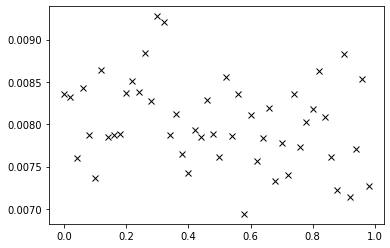

In [46]:
stdsBin = []
#np.arange(0,1,0.02)
for i in phaseDict:
    stdsBin.append(np.std(phaseDict[i]))
plt.plot(np.arange(0,1,0.02),stdsBin,'kx')

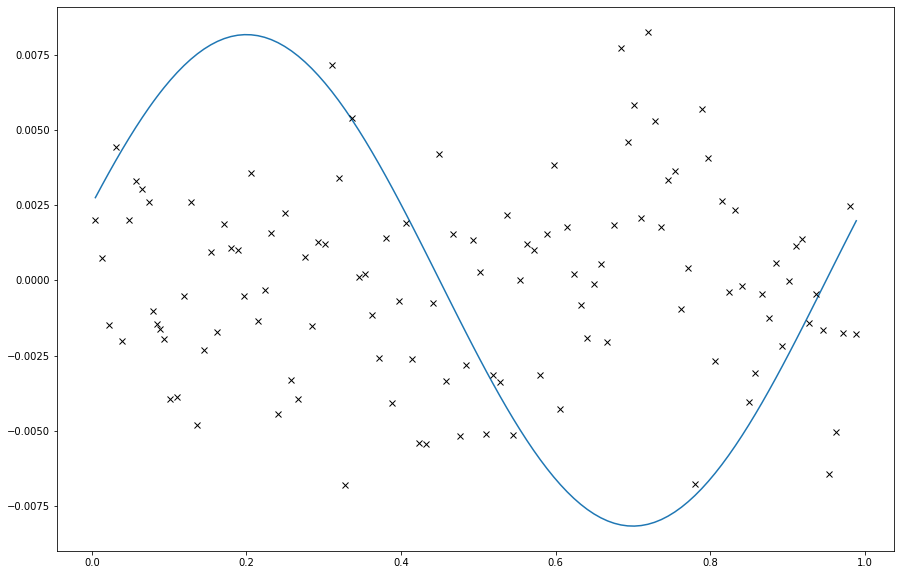

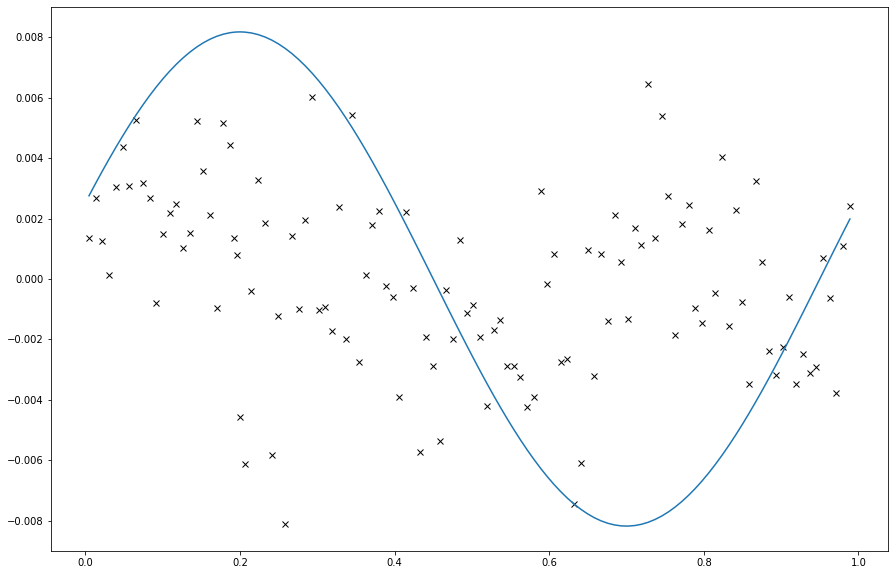

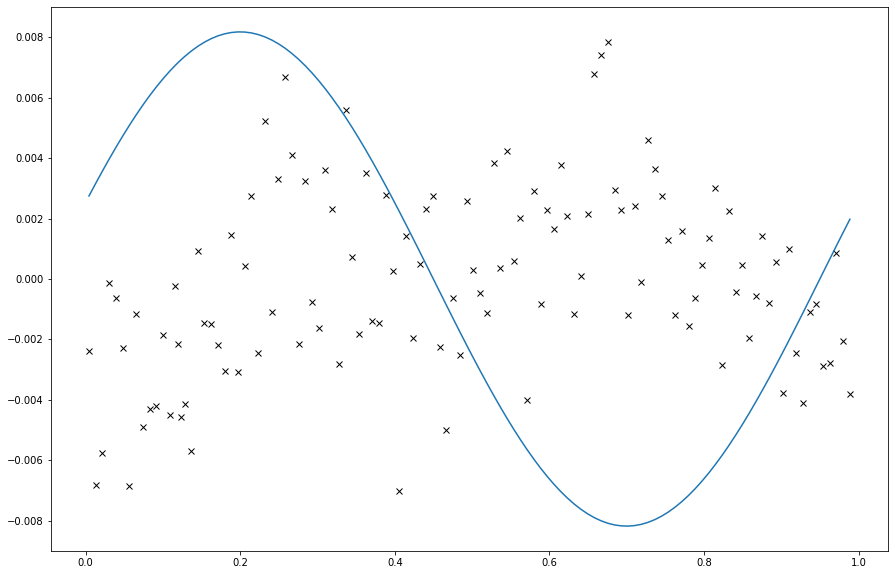

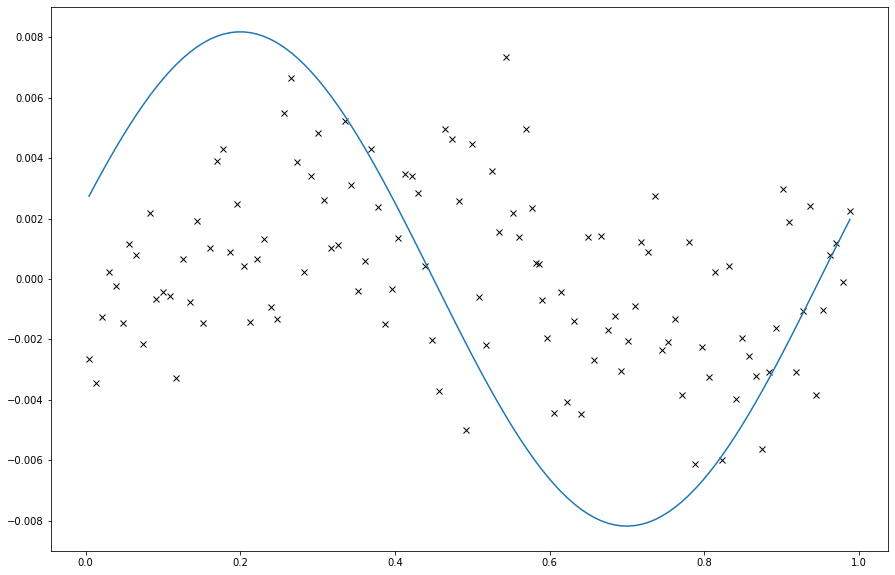

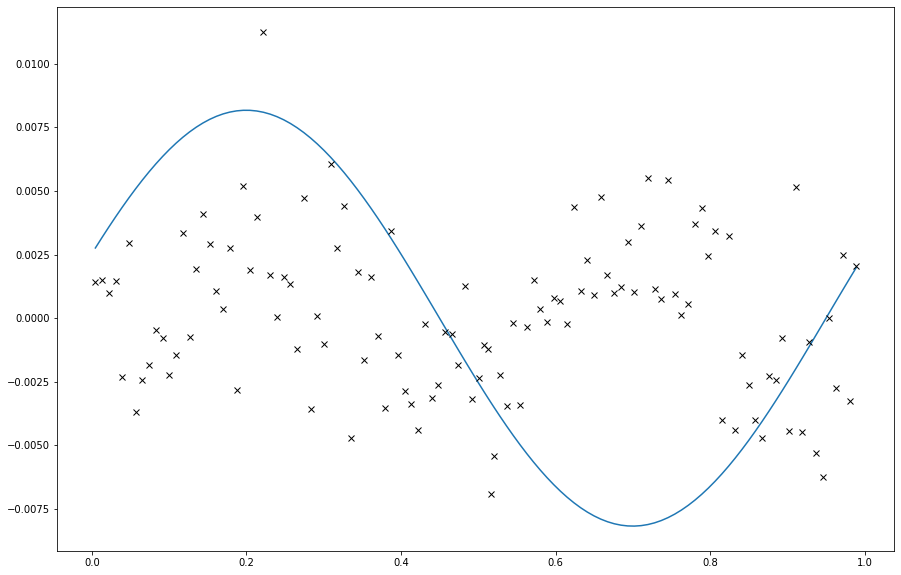

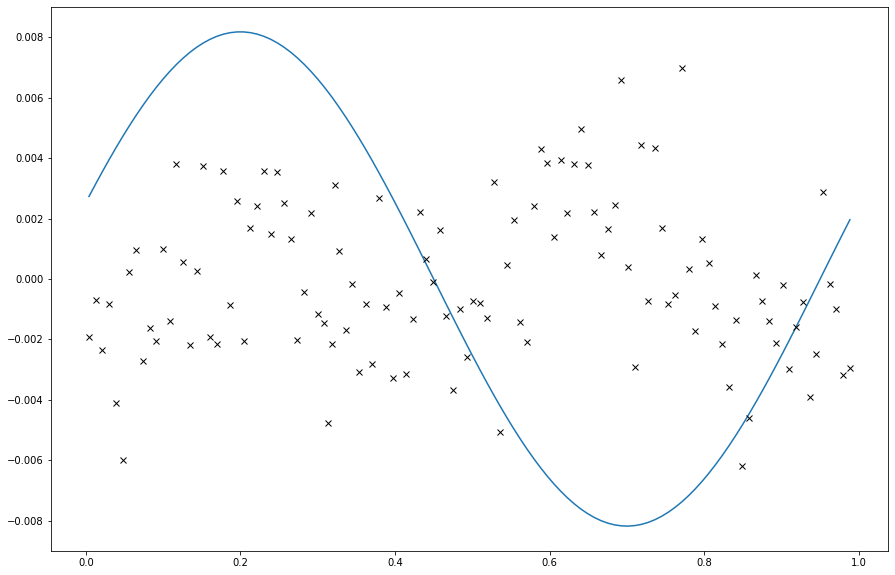

In [12]:
import matplotlib.backends.backend_pdf


phasesFold1 = foldMeth(timeLT,0.08029867)
sortInd = np.argsort(phasesFold1)
phasesFold1Sorted = phasesFold1[sortInd]
revFluxLTSorted = revFluxLT[sortInd]
revFluxLTSorted = np.array(revFluxLTSorted)
phasesFold1SortedMean = np.mean(phasesFold1Sorted[:-8].reshape(-1, 10), axis=1)
revFluxLTSortedMean = np.mean(revFluxLTSorted[:-8].reshape(-1, 10), axis=1)
residuals1Meaned = revFluxLTSortedMean - 0.008175438596491228*np.sin(phasesFold1SortedMean*0.08029867*(2*np.pi/0.08029867)+0.3149466319388264)
#needs to be on the samephase
fig1 = plt.figure(figsize=(15, 10)) 
plt.plot(phasesFold1SortedMean, 0.008175438596491228*np.sin(phasesFold1SortedMean*0.08029867*(2*np.pi/0.08029867)+0.3149466319388264))
plt.plot(phasesFold1SortedMean, residuals1Meaned, 'kx')

plt.show()





phasesFold2 = foldMeth(timeLT2,0.08029867)
sortInd = np.argsort(phasesFold2)
phasesFold2Sorted = phasesFold2[sortInd]
revFluxLTSorted2 = revFluxLT2[sortInd]
revFluxLTSorted2 = np.array(revFluxLTSorted2)
phasesFold2SortedMean = np.mean(phasesFold2Sorted[:-8].reshape(-1, 10), axis=1)
revFluxLTSortedMean2 = np.mean(revFluxLTSorted2[:-8].reshape(-1, 10), axis=1)
residuals2Meaned = revFluxLTSortedMean2 - 0.008175438596491228*np.sin(phasesFold2SortedMean*0.08029867*(2*np.pi/0.08029867)+0.3149466319388264)
#needs to be on the samephase
fig2 = plt.figure(figsize=(15, 10)) 
plt.plot(phasesFold2SortedMean, residuals2Meaned, 'kx')
plt.plot(phasesFold2SortedMean, 0.008175438596491228*np.sin(phasesFold2SortedMean*0.08029867*(2*np.pi/0.08029867)+0.3149466319388264))


plt.show()


phasesFold3 = foldMeth(timeLT3,0.08029867)
sortInd = np.argsort(phasesFold3)
phasesFold3Sorted = phasesFold3[sortInd]
revFluxLTSorted3 = revFluxLT3[sortInd]
revFluxLTSorted3 = np.array(revFluxLTSorted3)
phasesFold3SortedMean = np.mean(phasesFold3Sorted[:-8].reshape(-1, 10), axis=1)
revFluxLTSortedMean3 = np.mean(revFluxLTSorted3[:-8].reshape(-1, 10), axis=1)
residuals3Meaned = revFluxLTSortedMean3 - 0.008175438596491228*np.sin(phasesFold3SortedMean*0.08029867*(2*np.pi/0.08029867)+0.3149466319388264)
#needs to be on the samephase
fig3 = plt.figure(figsize=(15, 10)) 
plt.plot(phasesFold3SortedMean, residuals3Meaned, 'kx')
plt.plot(phasesFold3SortedMean, 0.008175438596491228*np.sin(phasesFold3SortedMean*0.08029867*(2*np.pi/0.08029867)+0.3149466319388264))

plt.show()



phasesFold5 = foldMeth(timeLT5,0.08029867)
sortInd = np.argsort(phasesFold5)
phasesFold5Sorted = phasesFold5[sortInd]
revFluxLTSorted5 = revFluxLT5[sortInd]
revFluxLTSorted5 = np.array(revFluxLTSorted5)
phasesFold5SortedMean = np.mean(phasesFold5Sorted[:-8].reshape(-1, 10), axis=1)
revFluxLTSortedMean5 = np.mean(revFluxLTSorted5[:-8].reshape(-1, 10), axis=1)
residuals5Meaned = revFluxLTSortedMean5 - 0.008175438596491228*np.sin(phasesFold5SortedMean*0.08029867*(2*np.pi/0.08029867)+0.3149466319388264)
#needs to be on the samephase
fig4 = plt.figure(figsize=(15, 10)) 
plt.plot(phasesFold5SortedMean, residuals5Meaned, 'kx')
plt.plot(phasesFold5SortedMean, 0.008175438596491228*np.sin(phasesFold5SortedMean*0.08029867*(2*np.pi/0.08029867)+0.3149466319388264))

plt.show()



phasesFold6 = foldMeth(timeLT6,0.08029867)
sortInd = np.argsort(phasesFold6)
phasesFold6Sorted = phasesFold6[sortInd]
revFluxLTSorted6 = revFluxLT6[sortInd]
revFluxLTSorted6 = np.array(revFluxLTSorted6)
phasesFold6SortedMean = np.mean(phasesFold6Sorted[:-8].reshape(-1, 10), axis=1)
revFluxLTSortedMean6 = np.mean(revFluxLTSorted6[:-8].reshape(-1, 10), axis=1)
residuals6Meaned = revFluxLTSortedMean6 - 0.008175438596491228*np.sin(phasesFold6SortedMean*0.08029867*(2*np.pi/0.08029867)+0.3149466319388264)
#needs to be on the samephase
fig5 = plt.figure(figsize=(15, 10)) 
plt.plot(phasesFold6SortedMean, 0.008175438596491228*np.sin(phasesFold6SortedMean*0.08029867*(2*np.pi/0.08029867)+0.3149466319388264))

plt.plot(phasesFold6SortedMean, residuals6Meaned, 'kx')

plt.show()



phasesFold7 = foldMeth(timeLT7,0.08029867)
sortInd = np.argsort(phasesFold7)
phasesFold7Sorted = phasesFold7[sortInd]
revFluxLTSorted7 = revFluxLT7[sortInd]
revFluxLTSorted7 = np.array(revFluxLTSorted7)
phasesFold7SortedMean = np.mean(phasesFold7Sorted[:-8].reshape(-1, 10), axis=1)
revFluxLTSortedMean7 = np.mean(revFluxLTSorted7[:-8].reshape(-1, 10), axis=1)
residuals7Meaned = revFluxLTSortedMean7 - 0.008175438596491228*np.sin(phasesFold7SortedMean*0.08029867*(2*np.pi/0.08029867)+0.3149466319388264)
#needs to be on the samephase
fig6 = plt.figure(figsize=(15, 10)) 
plt.plot(phasesFold7SortedMean, 0.008175438596491228*np.sin(phasesFold7SortedMean*0.08029867*(2*np.pi/0.08029867)+0.3149466319388264))

plt.plot(phasesFold7SortedMean, residuals7Meaned, 'kx')

plt.show()

#pdf = matplotlib.backends.backend_pdf.PdfPages("MeanedResiduals.pdf")
#for fig in [fig1,fig2,fig3,fig4,fig5]: ## will open an empty extra figure :(
#    pdf.savefig( fig )
#pdf.close()

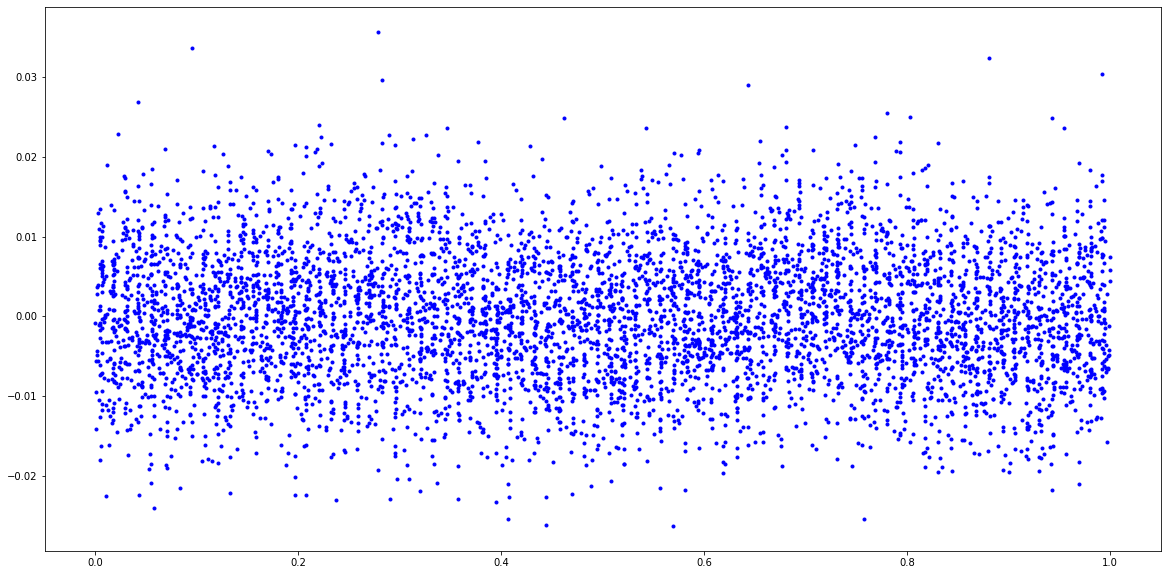

In [109]:
residualAll = fluxAll - 0.008175438596491228*np.sin(timeAll*(2*np.pi/0.08029867)+0.3149466319388264)
plt.figure(figsize=(20,10))
plt.plot(phasesAll,residualAll,'b.')

In [66]:
np.sqrt(2/len(timeLT))*np.std(revFluxLT-0.007507537688442211*np.sin(timeLT*(2*np.pi/0.08029867)+0.5367545237289094))/0.007507537688442211

0.050164972937890566

In [67]:
(0.05/(2* np.pi))*115

0.9151409227783982

In [32]:
from scipy.stats import pearsonr

# calculate Pearson's correlation
corr, _ = pearsonr(revFluxLT, 0.007507537688442211*np.sin(timeLT*(2*np.pi/0.08029867)+0.5367545237289094))
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.505


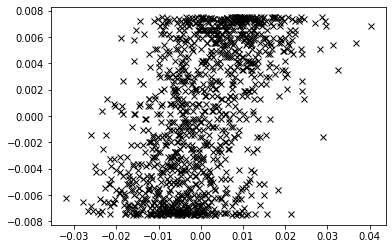

In [34]:
plt.plot(revFluxLT, 0.007507537688442211*np.sin(timeLT*(2*np.pi/0.08029867)+0.5367545237289094), 'kx')

In [38]:
(np.sqrt(1-(0.505**2))*0.009101322988576412)*(np.sqrt(1-(0.505**2))*0.009101322988576412)

6.17093188540766e-05

In [42]:
0.0000617

6.17e-05

(array([24., 10.,  7.,  8.,  6.,  4.,  6.,  4.,  6.,  4.,  4.,  5.,  4.,
         5.,  4.,  4.,  4.,  4.,  4.,  5.,  5.,  4.,  5.,  5.,  6.,  6.,
         6.,  8., 10., 23.]),
 array([9.80674742e-05, 9.90719130e-05, 1.00076352e-04, 1.01080791e-04,
        1.02085230e-04, 1.03089668e-04, 1.04094107e-04, 1.05098546e-04,
        1.06102985e-04, 1.07107424e-04, 1.08111863e-04, 1.09116301e-04,
        1.10120740e-04, 1.11125179e-04, 1.12129618e-04, 1.13134057e-04,
        1.14138496e-04, 1.15142934e-04, 1.16147373e-04, 1.17151812e-04,
        1.18156251e-04, 1.19160690e-04, 1.20165129e-04, 1.21169567e-04,
        1.22174006e-04, 1.23178445e-04, 1.24182884e-04, 1.25187323e-04,
        1.26191762e-04, 1.27196201e-04, 1.28200639e-04]),
 <a list of 30 Patch objects>)

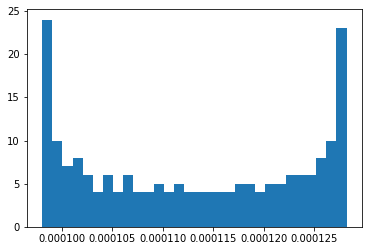

In [44]:
plt.hist(twoDStack1[:,0],bins=30)
#plt.plot([min(twoDStack1[0])+0.0000617, min(twoDStack1[0])+0.0000617],[0,40])

In [63]:
(0.03/(2*np.pi))*115

0.5490845536670389

In [61]:
#0.5367545237289094
np.linspace(0,2*np.pi, 200)[17]-np.linspace(0,2*np.pi, 200)[16]

0.031573795513465286

In [60]:
print(0.0001+0.000014)

0.000114


In [53]:
phaseSTD = np.std(twoDStack1,axis=0)
print(phaseSTD[17])

1.43109809290669e-05


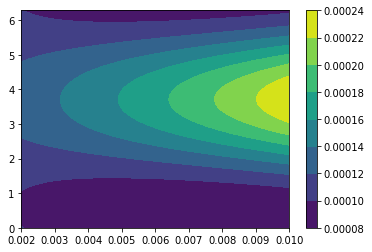

In [64]:
X,Y = np.meshgrid(np.linspace(0.002,0.01,200), np.linspace(0,2*np.pi, 200))
plt.contourf(X,Y,twoDStack1)
plt.colorbar()

In [15]:
1.8050792624229641-0.36218862672965035
#1.4428906356933138+0.22046264235717847
1.4214213007233096 - 0.1574733159694132

1.2639479847538964

In [18]:
np.mean(timeLT7-2457000)

2078.4199594560914

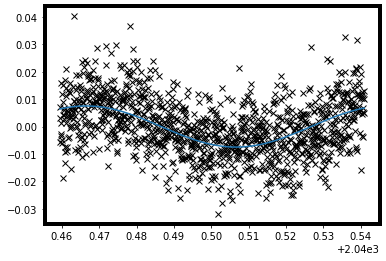

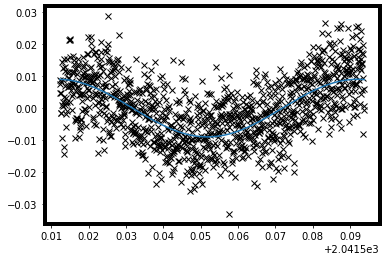

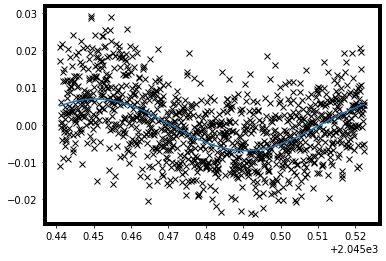

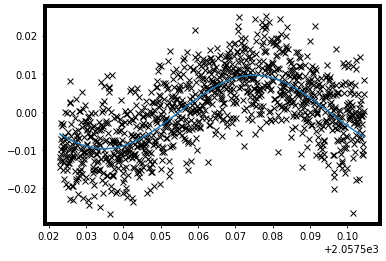

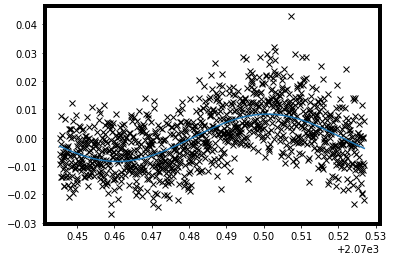

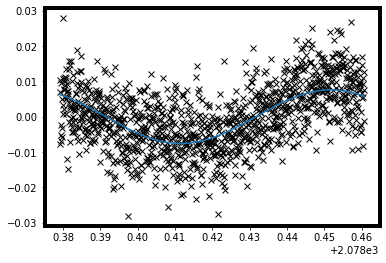

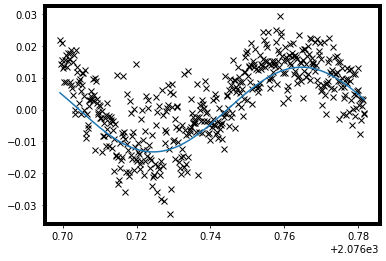

In [38]:
plt.plot(timeLT-2457000, revFluxLT,'kx')
plt.plot(timeLT-2457000, 0.007504504504504504*np.sin((timeLT-2457000)*(2*np.pi/0.08029867)+1.8050792624229641))
plt.show()

plt.plot(timeLT2-2457000, revFluxLT2,'kx')
plt.plot(timeLT2-2457000, 0.008987987987987986*np.sin((timeLT2-2457000)*(2*np.pi/0.08029867)+1.7044476659115793))
plt.show()
plt.plot(timeLT3-2457000, revFluxLT3,'kx')
plt.plot(timeLT3-2457000, 0.006933933933933933*np.sin((timeLT3-2457000)*(2*np.pi/0.08029867)+1.3773949772495788))
plt.show()
plt.plot(timeLT5-2457000, revFluxLT5,'kx')
plt.plot(timeLT5-2457000, 0.009615615615615615*np.sin((timeLT5-2457000)*(2*np.pi/0.08029867)+1.4214213007233096))
plt.show()
plt.plot(timeLT6-2457000, revFluxLT6,'kx')
plt.plot(timeLT6-2457000, 0.00836036036036036*np.sin((timeLT6-2457000)*(2*np.pi/0.08029867)+1.5912371198362716))
plt.show()
plt.plot(timeLT7-2457000, revFluxLT7,'kx')
plt.plot(timeLT7-2457000, 0.007573934837092732*np.sin((timeLT7-2457000)*(2*np.pi/0.08029867)+1.4959965017094252))
plt.show()


plt.plot(JJTimes-2457000, JJFlux,'kx')
plt.plot(JJTimes-2457000, 0.013283208020050126 *np.sin((JJTimes-2457000)*(2*np.pi/0.08029867)+1.5589858280971907 ))
plt.show()



LTPhases = np.array([1.8050792624229641,1.7044476659115793,1.3773949772495788,1.4214213007233096,1.5912371198362716,1.4959965017094252])
LTPhases = 0.08029870*24*60*(np.array(LTPhases)-1.5031844728888097)/(2*np.pi)
LTErrors = np.array([0.10270689950832428, 0.06991865371144347, 0.08952566618994297,0.060148684186735704,0.0827577878627632,0.03735358256027288*2])
LTErrors = 0.08029870*24*60*(np.array(LTErrors))/(2*np.pi)
LTTimes = np.array([2040.4978964041147,2041.5530624999956,2045.4816800695817,2057.5637622971935,2070.4861575964906,2078.4199594560914])






In [39]:
tmpt16 = np.load('TESStmpt16.npy')
toplot16 = np.load('TESStoplot16.npy')
toerr16 = np.load('TESStoerr16.npy')
alltmpts = np.load('TESSalltmpts.npy')
toplot = np.load('TESStoplot.npy')
toerr = np.load('TESStoerr.npy')

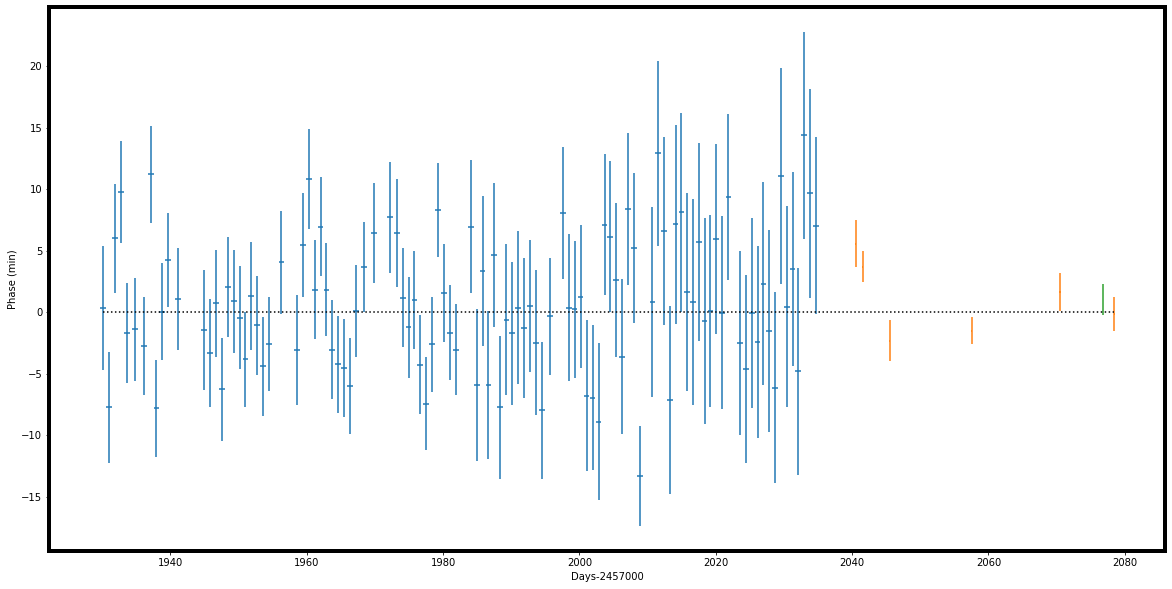

1.1590167772865632


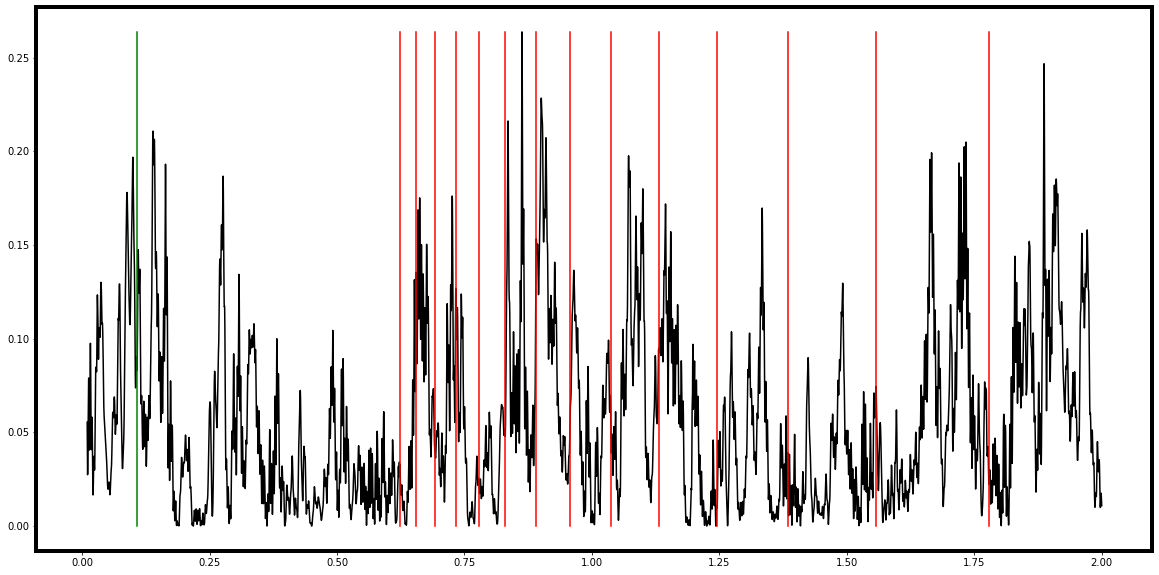

In [65]:

sec16TErr = np.ones(len(tmpt16))*(1200.857142857143/60/24/2)
sec23TErr = np.ones(24)*(1237.5833333333333/60/24/2)
sec24TErr = np.ones(26)*(1234.2307692307693/60/24/2)
sec25TErr = np.ones(28)*(1231.857142857143/60/24/2)
sec26TErr = np.ones(28)*(1210.142857142857/60/24/2)
tessTimeErrorsTot = np.append(sec23TErr,sec24TErr)
tessTimeErrorsTot = np.append(tessTimeErrorsTot,sec25TErr)
tessTimeErrorsTot = np.append(tessTimeErrorsTot,sec26TErr)
LTTimeError = 0.08029867*np.ones(len(LTPhases))
plt.figure(figsize=(20,10))
plt.errorbar(alltmpts, toplot,yerr=toerr, xerr=tessTimeErrorsTot,ls='')
plt.errorbar(LTTimes, LTPhases,yerr=LTErrors,xerr=0.08029867,ls='')
plt.errorbar(np.mean(JJTimes)-2457000, 0.08029870*24*60*(1.5589858280971907-1.5031844728888097)/(2*np.pi) , yerr=0.08029870*24*60*(0.03501621751558392*2)/(2*np.pi))
plt.plot([alltmpts[0],LTTimes[-1]],[0,0], 'k:')
plt.xlabel('Days-2457000')
plt.ylabel('Phase (min)')
plt.savefig('TESSLTPerOC.pdf')
plt.show()
allallTime = np.append(tmpt16, alltmpts)
allallTime = np.append(allallTime, LTTimes)
allallPhase = np.append(toplot16, toplot)
allallPhase = np.append(allallPhase, LTPhases)
allallTError = np.append(sec16TErr, tessTimeErrorsTot)
allallTError = np.append(allallTError, LTTimeError)

allallPhError = np.append(toerr16, toerr)
allallPhError = np.append(allallPhError, LTErrors)
allallTime = np.append(allallTime,np.mean(JJTimes)-2457000)
allallPhase = np.append(allallPhase,0.08029870*24*60*(1.5589858280971907-1.5031844728888097)/(2*np.pi))
allallTError = np.append(allallTError, 0.08029870*24*60*(0.03501621751558392*2)/(2*np.pi))
freq = np.linspace(0.01,2,10000)
powerPl = LombScargle(allallTime,allallPhase,dy=allallTError).power(freq)

plt.figure(figsize=(20,10))
plt.plot(freq,powerPl, c='k')
print(1/freq[np.argmax(powerPl)])
#plt.plot([1/(2*0.08029867),1/(2*0.08029867)],[0,np.max(powerPl)],c='r')
#plt.plot([1/(3*0.08029867),1/(3*0.08029867)],[0,np.max(powerPl)],c='r')
#plt.plot([1/(4*0.08029867),1/(4*0.08029867)],[0,np.max(powerPl)],c='r')
#plt.plot([1/(5*0.08029867),1/(5*0.08029867)],[0,np.max(powerPl)],c='r')
#plt.plot([1/(6*0.08029867),1/(6*0.08029867)],[0,np.max(powerPl)],c='r')
plt.plot([1/(7*0.08029867),1/(7*0.08029867)],[0,np.max(powerPl)],c='r')
plt.plot([1/(8*0.08029867),1/(8*0.08029867)],[0,np.max(powerPl)],c='r')
plt.plot([1/(9*0.08029867),1/(9*0.08029867)],[0,np.max(powerPl)],c='r')
plt.plot([1/(10*0.08029867),1/(10*0.08029867)],[0,np.max(powerPl)],c='r')
plt.plot([1/(11*0.08029867),1/(11*0.08029867)],[0,np.max(powerPl)],c='r')
plt.plot([1/(12*0.08029867),1/(12*0.08029867)],[0,np.max(powerPl)],c='r')
plt.plot([1/(13*0.08029867),1/(13*0.08029867)],[0,np.max(powerPl)],c='r')
plt.plot([1/(14*0.08029867),1/(14*0.08029867)],[0,np.max(powerPl)],c='r')
plt.plot([1/(15*0.08029867),1/(15*0.08029867)],[0,np.max(powerPl)],c='r')
plt.plot([1/(16*0.08029867),1/(16*0.08029867)],[0,np.max(powerPl)],c='r')
plt.plot([1/(17*0.08029867),1/(17*0.08029867)],[0,np.max(powerPl)],c='r')
plt.plot([1/(18*0.08029867),1/(18*0.08029867)],[0,np.max(powerPl)],c='r')
plt.plot([1/(19*0.08029867),1/(19*0.08029867)],[0,np.max(powerPl)],c='r')
plt.plot([1/(20*0.08029867),1/(20*0.08029867)],[0,np.max(powerPl)],c='r')
plt.plot([1/(9.28494202143),1/(9.28494202143)],[0,np.max(powerPl)],c='g')


In [149]:
1200.857142857143/60/24/2

0.41696428571428573

In [66]:
listTT =  np.append(tmpt16, alltmpts)

listPT = np.append(toplot16, toplot)

listDelXT = np.ones(len(listPT))*0.1

listDelYT = np.append(toerr16,toerr)
#dat = np.array([listT, listP,listDelY])

#dat = dat.T

#np.savetxt('.dat', dat, delimiter = '\t')



listTL =  LTTimes

listPL = LTPhases

listDelXL = np.ones(len(LTPhases))

listDelYL = LTErrors
dat = np.array([listTL, listPL,listDelXL,listDelYL])

dat = dat.T

#np.savetxt('LTOCTable.dat', dat, delimiter = '\t')


listTLP =  [np.mean(JJTimes)-2457000]

listPLP = [0.08029870*24*60*(1.5589858280971907-1.5031844728888097)/(2*np.pi)]

listDelXLP = [1]

listDelYLP = [0.08029870*24*60*(0.03501621751558392*2)/(2*np.pi)]
#dat = np.array([listTL, listPL,listDelXL,listDelYL])

#dat = dat.T

#np.savetxt('PerkinsOCTable.dat', dat, delimiter = '\t')

0       0.005079
1       0.005105
2       0.005131
3       0.005156
4       0.005182
          ...   
1163    0.005411
1164    0.005434
1165    0.005458
1166    0.005481
1167    0.005504
Name: JD_UTC, Length: 1168, dtype: float64

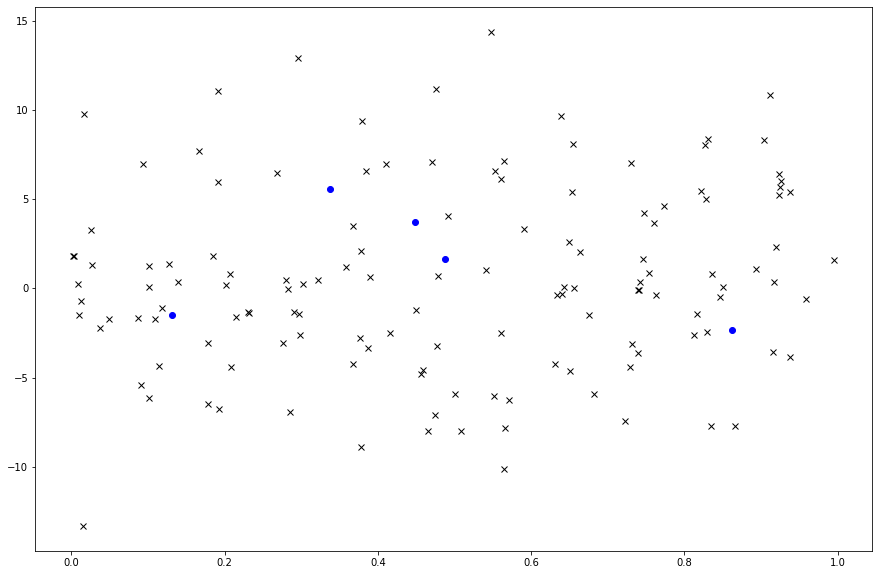

In [10]:
periodTry = 9.52
allallphases = foldMeth(listTT,periodTry)

sortIndi = np.argsort(allallphases)
allallphases = allallphases[sortIndi]
allallFluxSorted = listPT[sortIndi]
allallErrSorted = listDelYT[sortIndi]
plt.figure(figsize=(15,10))
plt.plot(allallphases, allallFluxSorted,'kx')

allallphases = foldMeth(listTL,periodTry)

sortIndi = np.argsort(allallphases)
allallphases = allallphases[sortIndi]
allallFluxSorted = listPL[sortIndi]
allallErrSorted = listDelYL[sortIndi]
plt.plot(allallphases, allallFluxSorted,'bo')
model = 2.86001775*np.sin(np.linspace(0,1,1000)*periodTry*(2*np.pi/periodTry)+(0.606438*2*np.pi)) 
#plt.plot(np.linspace(0,1,1000), model)
plt.savefig('fold952.pdf')

0.006933933933933933*np.sin((timeLT3-2457000)*(2*np.pi/0.08029867)+1.3773949772495788)

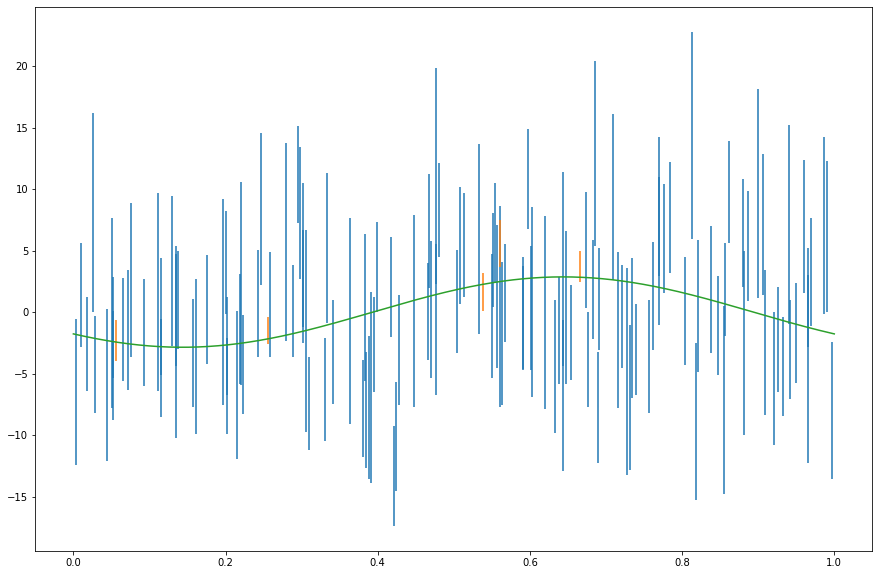

In [170]:
periodTry = 1/0.0992704329
allallphases = foldMeth(listTT,periodTry)

sortIndi = np.argsort(allallphases)
allallphases = allallphases[sortIndi]
allallFluxSorted = listPT[sortIndi]
allallErrSorted = listDelYT[sortIndi]
plt.figure(figsize=(15,10))
plt.errorbar(allallphases, allallFluxSorted,yerr=allallErrSorted, ls='')

allallphases = foldMeth(listTL,periodTry)

sortIndi = np.argsort(allallphases)
allallphases = allallphases[sortIndi]
allallFluxSorted = listPL[sortIndi]
allallErrSorted = listDelYL[sortIndi]
plt.errorbar(allallphases, allallFluxSorted,yerr=allallErrSorted, ls='')
model = 2.86001775*np.sin(np.linspace(0,1,1000)*periodTry*(2*np.pi/periodTry)+(0.606438*2*np.pi)) 
plt.plot(np.linspace(0,1,1000), model)
plt.savefig('foldObsWeightLarger.pdf')

In [172]:
 1/0.0992704329

10.073492889945884

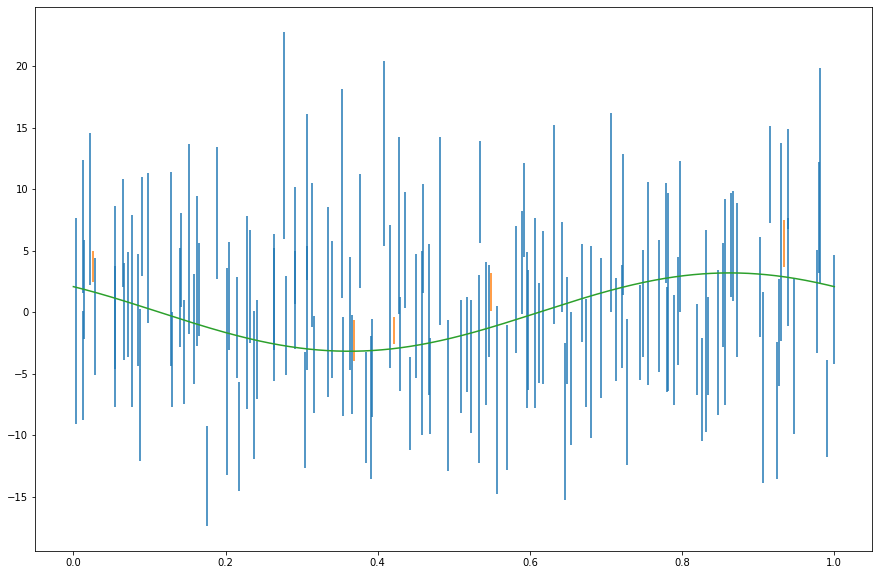

In [169]:
periodTry = 1/0.08720107936324359
allallphases = foldMeth(listTT,periodTry)

sortIndi = np.argsort(allallphases)
allallphases = allallphases[sortIndi]
allallFluxSorted = listPT[sortIndi]
allallErrSorted = listDelYT[sortIndi]
plt.figure(figsize=(15,10))
plt.errorbar(allallphases, allallFluxSorted,yerr=allallErrSorted, ls='')

allallphases = foldMeth(listTL,periodTry)

sortIndi = np.argsort(allallphases)
allallphases = allallphases[sortIndi]
allallFluxSorted = listPL[sortIndi]
allallErrSorted = listDelYL[sortIndi]
plt.errorbar(allallphases, allallFluxSorted,yerr=allallErrSorted, ls='')
model = 3.18382699*np.sin(np.linspace(0,1,1000)*periodTry*(2*np.pi/periodTry)+(0.387526*2*np.pi)) 
plt.plot(np.linspace(0,1,1000), model)
plt.savefig('foldObsWeightSmaller.pdf')

In [173]:
1/0.163238007

6.126024314913377

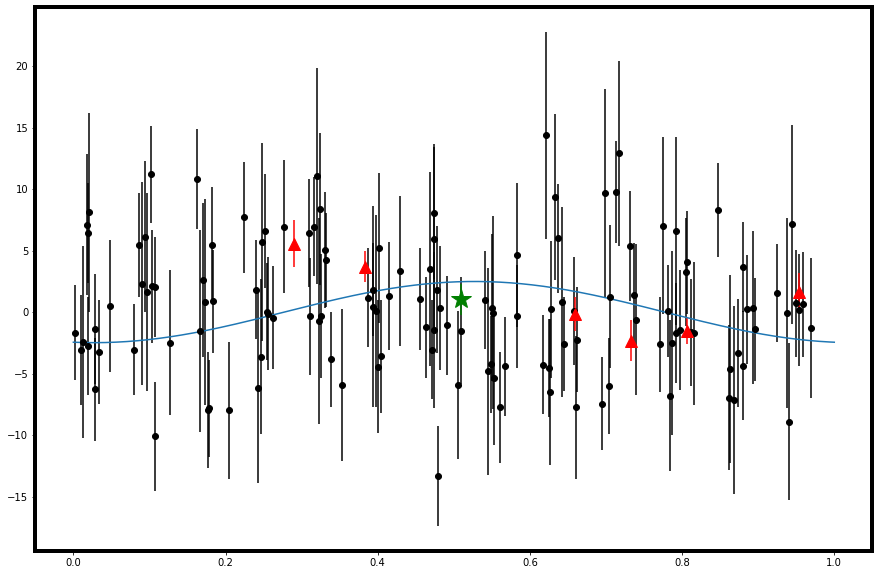

In [67]:
periodTry = 1/0.0888458741
allallphases = foldMeth(listTT,periodTry)
plt.figure(figsize=(15,10))
sortIndi = np.argsort(allallphases)
allallphases = allallphases[sortIndi]
allallFluxSorted = listPT[sortIndi]
allallErrSorted = listDelYT[sortIndi]
plt.errorbar(allallphases, allallFluxSorted,yerr=allallErrSorted, ls='',c='k', marker='o')

allallphases = foldMeth(listTL,periodTry)

sortIndi = np.argsort(allallphases)
allallphases = allallphases[sortIndi]
allallFluxSorted = listPL[sortIndi]
allallErrSorted = listDelYL[sortIndi]
plt.errorbar(allallphases, allallFluxSorted,yerr=allallErrSorted, ls='', c='r', marker='^',ms=12)


allallphases = foldMeth(listTLP,periodTry)

sortIndi = np.argsort(allallphases)
sortIndi = np.int(sortIndi)
allallphases = allallphases[sortIndi]
allallFluxSorted = listPLP[sortIndi]
allallErrSorted = listDelYLP[sortIndi]
plt.errorbar(allallphases, allallFluxSorted,yerr=allallErrSorted, ls='', c='g', marker='*', ms=20)




model = 2.48682194*np.sin(np.linspace(0,1,1000)*periodTry*(2*np.pi/periodTry)+(0.722849*2*np.pi)) 
plt.plot(np.linspace(0,1,1000), model)
plt.savefig('OCFolded0888.pdf')

<ErrorbarContainer object of 3 artists>

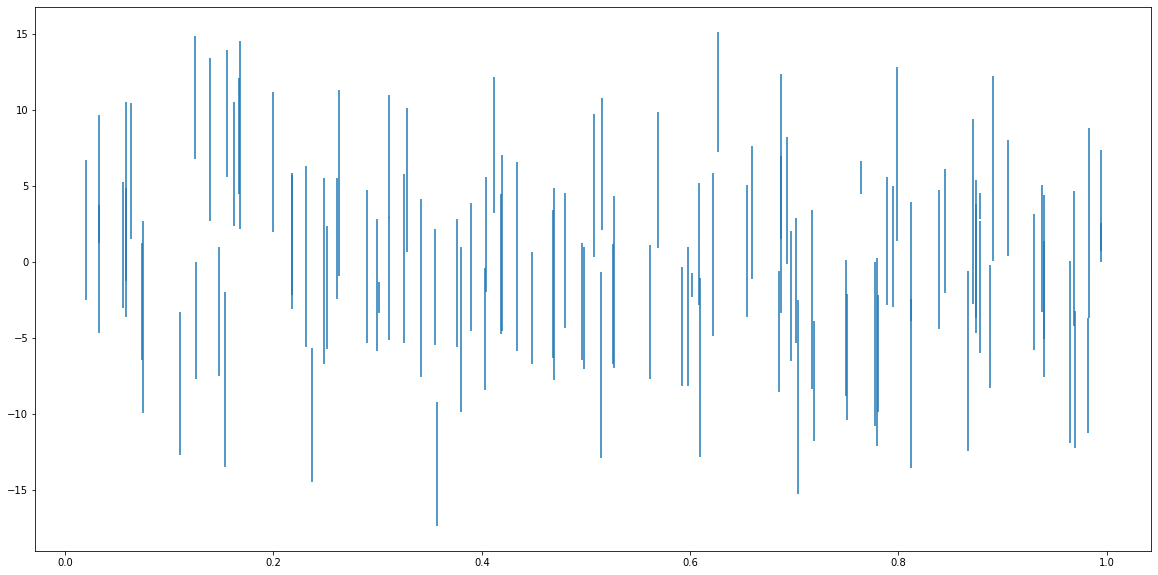

In [113]:
allallphases = foldMeth(allallTime,9.28494202143)

sortIndi = np.argsort(allallphases)
allallphases = allallphases[sortIndi]
allallFluxSorted = allallPhase[sortIndi]
allallErrSorted = allallPhError[sortIndi]
plt.figure(figsize=(20,10))
plt.errorbar(allallphases, allallFluxSorted,yerr=allallErrSorted, ls='')

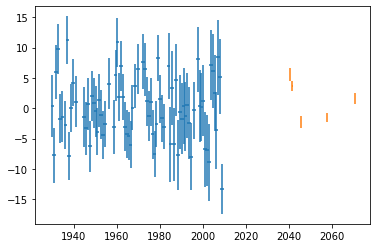

11.417120542595828


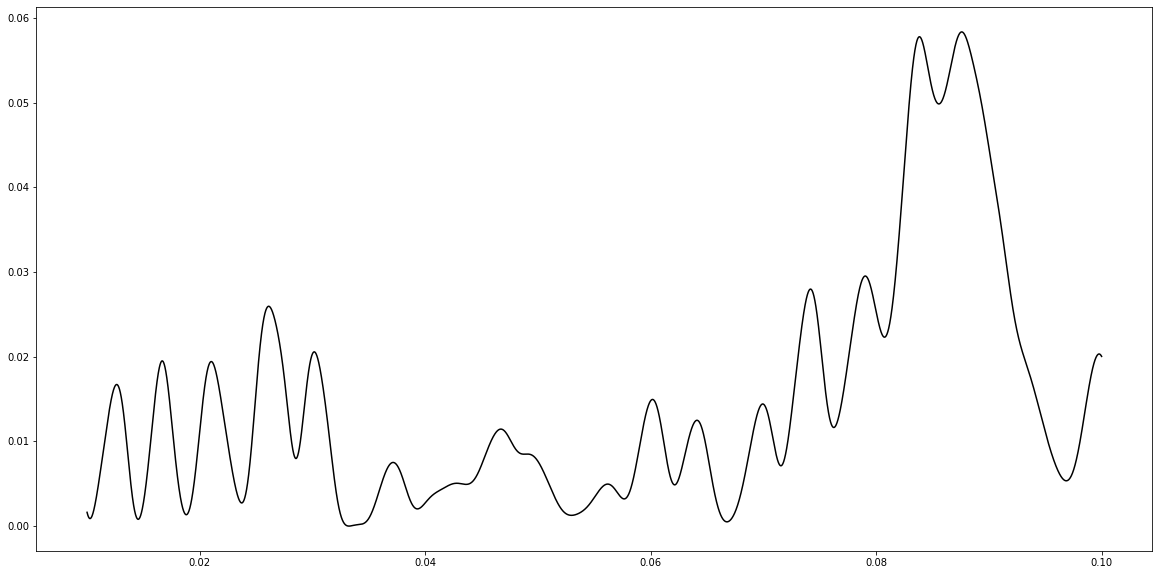

In [164]:

sec16TErr = np.ones(len(tmpt16))*(1200.857142857143/60/24)
sec23TErr = np.ones(24)*(1237.5833333333333/60/24)
sec24TErr = np.ones(26)*(1234.2307692307693/60/24)
sec25TErr = np.ones(28)*(1231.857142857143/60/24)
tessTimeErrorsTot = np.append(sec23TErr,sec24TErr)
tessTimeErrorsTot = np.append(tessTimeErrorsTot,sec25TErr)
LTTimeError = 0.08029867*np.ones(len(LTPhases))

plt.errorbar(alltmpts, toplot,yerr=toerr, xerr=tessTimeErrorsTot,ls='')
plt.errorbar(LTTimes, LTPhases,yerr=LTErrors,xerr=0.08029867,ls='')
plt.show()
allallTime = np.append(tmpt16, alltmpts)
allallTime = np.append(allallTime, LTTimes)
allallPhase = np.append(toplot16, toplot)
allallPhase = np.append(allallPhase, LTPhases)
allallTError = np.append(sec16TErr, tessTimeErrorsTot)
#allallTError = np.append(allallTError, LTTimeError)

allallPhError = np.append(toerr16, toerr)
allallPhError = np.append(allallPhError, LTErrors)


freq = np.linspace(0.01,0.1,10000)
powerPl = LombScargle(allallTime,allallPhase).power(freq)

plt.figure(figsize=(20,10))
plt.plot(freq,powerPl, c='k')
print(1/freq[np.argmax(powerPl)])
#plt.plot([1/(2*0.08029867),1/(2*0.08029867)],[0,np.max(powerPl)],c='r')
#plt.plot([1/(3*0.08029867),1/(3*0.08029867)],[0,np.max(powerPl)],c='r')
#plt.plot([1/(4*0.08029867),1/(4*0.08029867)],[0,np.max(powerPl)],c='r')
#plt.plot([1/(5*0.08029867),1/(5*0.08029867)],[0,np.max(powerPl)],c='r')
#plt.plot([1/(6*0.08029867),1/(6*0.08029867)],[0,np.max(powerPl)],c='r')
#plt.plot([1/(7*0.08029867),1/(7*0.08029867)],[0,np.max(powerPl)],c='r')
#plt.plot([1/(8*0.08029867),1/(8*0.08029867)],[0,np.max(powerPl)],c='r')
#plt.plot([1/(9*0.08029867),1/(9*0.08029867)],[0,np.max(powerPl)],c='r')
#plt.plot([1/(10*0.08029867),1/(10*0.08029867)],[0,np.max(powerPl)],c='r')
#plt.plot([1/(11*0.08029867),1/(11*0.08029867)],[0,np.max(powerPl)],c='r')
#plt.plot([1/(12*0.08029867),1/(12*0.08029867)],[0,np.max(powerPl)],c='r')
#plt.plot([1/(13*0.08029867),1/(13*0.08029867)],[0,np.max(powerPl)],c='r')
#plt.plot([1/(14*0.08029867),1/(14*0.08029867)],[0,np.max(powerPl)],c='r')
#plt.plot([1/(15*0.08029867),1/(15*0.08029867)],[0,np.max(powerPl)],c='r')
#plt.plot([1/(16*0.08029867),1/(16*0.08029867)],[0,np.max(powerPl)],c='r')
#plt.plot([1/(17*0.08029867),1/(17*0.08029867)],[0,np.max(powerPl)],c='r')
#plt.plot([1/(18*0.08029867),1/(18*0.08029867)],[0,np.max(powerPl)],c='r')
#plt.plot([1/(19*0.08029867),1/(19*0.08029867)],[0,np.max(powerPl)],c='r')
#plt.plot([1/(20*0.08029867),1/(20*0.08029867)],[0,np.max(powerPl)],c='r')
#plt.plot([1/(9.28494202143),1/(9.28494202143)],[0,np.max(powerPl)],c='g')


In [121]:
1/1.1595517188594437

0.8624022402240223

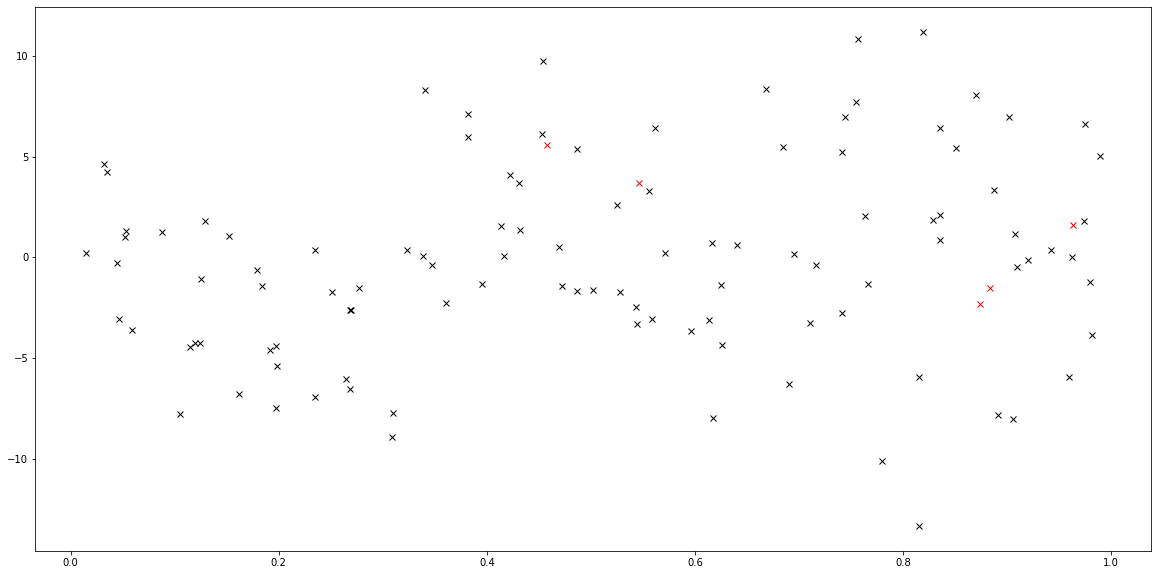

In [147]:

allallphases = foldMeth(allallTime,11.970692813274432)

sortIndi = np.argsort(allallphases)
allallphases = allallphases[sortIndi]
allallFluxSorted = allallPhase[sortIndi]
allallErrSorted = allallPhError[sortIndi]
plt.figure(figsize=(20,10))
plt.plot(allallphases, allallFluxSorted,'kx')

allallLTPhases = foldMeth(LTTimes,11.970692813274432)
sortIndi = np.argsort(allallLTPhases)
allallLTPhases = allallLTPhases[sortIndi]
allallFluxSorted = LTPhases[sortIndi]

plt.plot(allallLTPhases, allallFluxSorted,'rx')

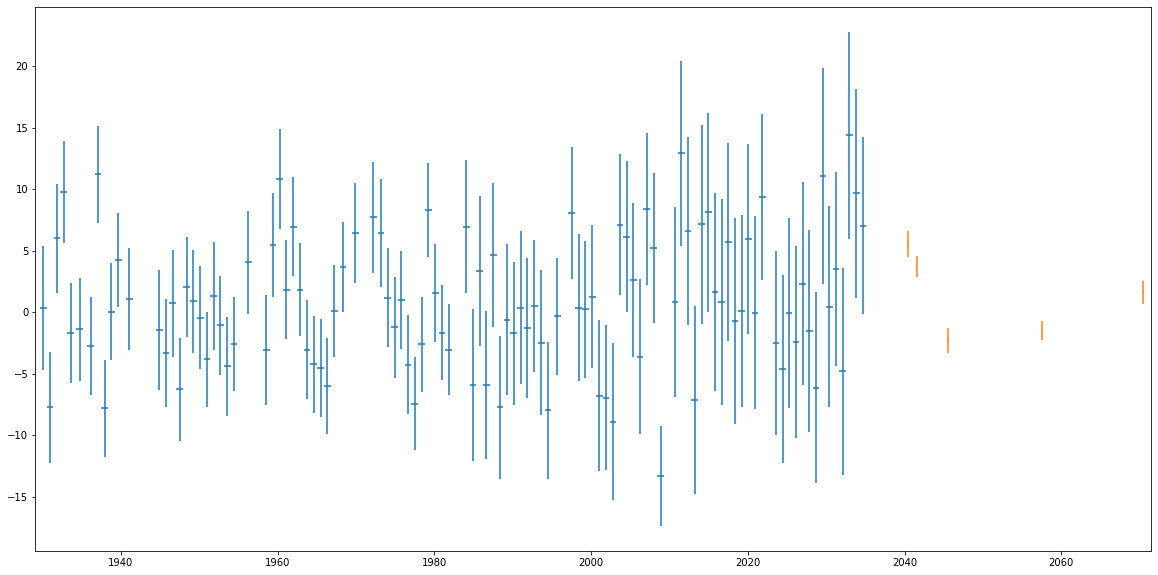

In [185]:
plt.figure(figsize=(20,10))
alltmptsModel = np.linspace(alltmpts[0],LTTimes[-1],10000)
#plt.plot(alltmptsModel, 4*np.sin(alltmptsModel*(2*np.pi/11.970692813274432)+3.5))
plt.errorbar(alltmpts, toplot,yerr=toerr, xerr=tessTimeErrorsTot/2,ls='')
plt.errorbar(LTTimes, LTPhases,yerr=LTErrors,xerr=0.08029867,ls='')

plt.xlim(alltmpts[0]-1,LTTimes[-1]+1)
plt.savefig('TESSLTOC.pdf')

In [178]:
kepConst = 7.496*(10**(-6)) #au/days
periodEst = 100#12 #days
separation = (kepConst*periodEst*periodEst)**(1/3) #au
periodAmp = 2*60 #seconds
massPlanet = (periodAmp*0.00200399*0.67)/separation
print(massPlanet) #solar Masses

0.3821275995471801


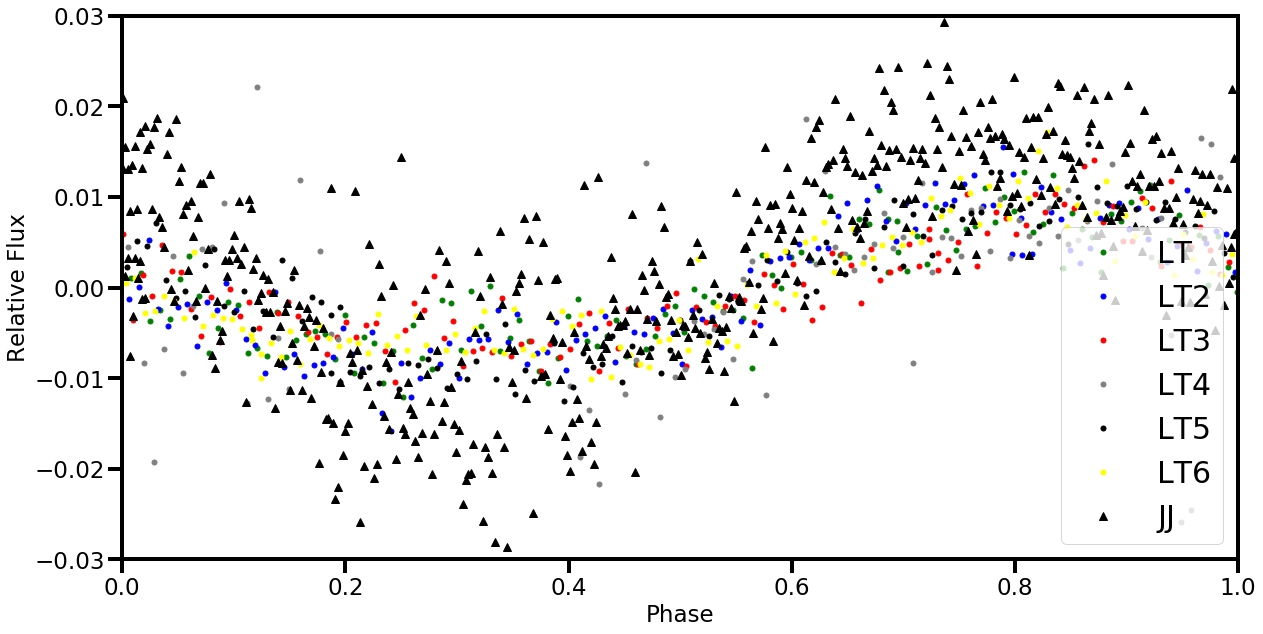

In [16]:
from pylab import *
rc('axes', linewidth=4)






f,ax = plt.subplots(1,1,gridspec_kw={'hspace': 0., 'wspace': 0.}, facecolor='w', figsize=(20,10))
ax.plot(phasesLTMean, fluxLTMean, c='g', marker='o', ms=5, label='LT', ls='')
ax.plot(phasesLTMean2, fluxLTMean2, c='b', marker='o', ms=5, label='LT2', ls='')
ax.plot(phasesLTMean3, fluxLTMean3, c='r', marker='o', ms=5, label='LT3', ls='')

ax.plot(phasesLTMean4, fluxLTMean4, c='grey', marker='o', ms=5, label='LT4', ls='')
ax.plot(phasesLTMean5, fluxLTMean5, c='k', marker='o', ms=5, label='LT5', ls='')
ax.plot(phasesLTMean6, fluxLTMean6, c='yellow', marker='o', ms=5, label='LT6', ls='')
ax.plot(JJPhases, JJFlux, c='k', marker='^', ms=8, label='JJ', ls='')

ax.legend(prop={'size': 30})
ax.set_xlabel("Phase", fontsize=23)
ax.set_ylabel('Relative Flux', fontsize=23)
#ax.xaxis.set_label_coords(1.0, -0.1)
ax.set_xlim(0,1)
#ax2.set_xlim(6250,7200)

#ax.set_ylim(0.9,1.12)
ax.set_ylim(-0.03,0.03)


#ax.yaxis.tick_left()
#ax.tick_params(labelright='off')
#ax2.tick_params(labelright='on')
#ax2.yaxis.tick_right()
#ax2.yaxis.set_label_position("right")


#ax.set_yticks(np.arange(0.9, 1.12, 0.05))
#ax2.set_yticks(np.arange(0.9, 1.12, 0.05))
ax.xaxis.set_minor_locator(AutoMinorLocator())
#ax2.xaxis.set_minor_locator(AutoMinorLocator())
#ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(which='both', width=4)
ax.tick_params(which='major', length=14)
#ax.tick_params(which='minor', length=8)
#ax2.tick_params(which='both', width=4)
#ax2.tick_params(which='major', length=14)
#ax2.tick_params(which='minor', length=8)
ax.tick_params(labelsize=23)
#ax2.tick_params(labelsize=23)


#plt.savefig('GD356_LT&TESS.pdf') 
#plt.show()

In [231]:
dataLT = pd.read_csv('mes2.csv', delimiter=',')
timeLT = dataLT['JD_UTC']-2457000
revFluxLT = dataLT['rel_flux_T1']
revFluxLT = (revFluxLT/np.mean(revFluxLT))-1
phasesLT = foldMeth(timeLT,0.08029870250017346)
sortIndi = np.argsort(phasesLT)
phasesLTs = phasesLT[sortIndi]
revFluxLTs = revFluxLT[sortIndi]
dataLT = pd.read_csv('mes2.csv', delimiter=',')
timeLT = dataLT['JD_UTC']-2457000
revFluxLT = dataLT['rel_flux_T1']
revFluxLT = (revFluxLT/np.mean(revFluxLT))-1
timeLTMean = timeLT
fluxLTMean = revFluxLT
phasesLTMean = foldMeth(timeLTMean,0.08029870250017346)
sortIndi = np.argsort(phasesLTMean)
phasesLTMean = phasesLTMean[sortIndi]
fluxLTMean = fluxLTMean[sortIndi]


dataLT2 = pd.read_csv('LT/2/Measurements.xls', delimiter='\t')
timeLT2 = dataLT2['JD_UTC']-2457000
revFluxLT2 = dataLT2['rel_flux_T1']
revFluxLT2 = (revFluxLT2/np.mean(revFluxLT2))-1
timeLTMean2 = timeLT2
fluxLTMean2 = revFluxLT2
phasesLTMean2 = foldMeth(timeLTMean2,0.08029870250017346)
sortIndi = np.argsort(phasesLTMean2)
phasesLTMean2 = phasesLTMean2[sortIndi]
fluxLTMean2 = fluxLTMean2[sortIndi]




dataLT3 = pd.read_csv('LT/3/Measurements031020.xls', delimiter='\t')
timeLT3 = dataLT3['JD_UTC']-2457000
revFluxLT3 = dataLT3['rel_flux_T1']
revFluxLT3 = (revFluxLT3/np.mean(revFluxLT3))-1
timeLTMean3 = timeLT3
fluxLTMean3 = revFluxLT3
phasesLTMean3 = foldMeth(timeLTMean3,0.08029870250017346)
sortIndi = np.argsort(phasesLTMean3)
phasesLTMean3 = phasesLTMean3[sortIndi]
fluxLTMean3 = fluxLTMean3[sortIndi]





dataLT4 = pd.read_csv('LT/4/aligned/Measurements.xls', delimiter='\t')
timeLT4 = dataLT4['JD_UTC']-2457000
revFluxLT4 = dataLT4['rel_flux_T1']
revFluxLT4 = (revFluxLT4/np.mean(revFluxLT4))-1
timeLTMean4 = timeLTMean4
fluxLTMean4 = revFluxLT4
phasesLTMean4 = foldMeth(timeLTMean4,0.08029870250017346)
sortIndi = np.argsort(phasesLTMean4)
phasesLTMean4 = phasesLTMean4[sortIndi]
fluxLTMean4 = fluxLTMean4[sortIndi]


dataLT5 = pd.read_csv('LT/5/Measurements.xls', delimiter='\t')
timeLT5 = dataLT5['JD_UTC']-2457000
revFluxLT5 = dataLT5['rel_flux_T1']
revFluxLT5 = (revFluxLT5/np.mean(revFluxLT5))-1
timeLTMean5 = timeLT5
fluxLTMean5 = revFluxLT5
phasesLTMean5 = foldMeth(timeLTMean5,0.08029870250017346)
sortIndi = np.argsort(phasesLTMean5)
phasesLTMean5 = phasesLTMean5[sortIndi]
fluxLTMean5 = fluxLTMean5[sortIndi]


dataLT6 = pd.read_csv('LT/6/Measurements.xls', delimiter='\t')
timeLT6 = dataLT6['JD_UTC']-2457000
revFluxLT6 = dataLT6['rel_flux_T1']
revFluxLT6 = (revFluxLT6/np.mean(revFluxLT6))-1
timeLTMean6 = timeLT6
fluxLTMean6 = revFluxLT6
phasesLTMean6 = foldMeth(timeLTMean6,0.08029870250017346)
sortIndi = np.argsort(phasesLTMean6)
phasesLTMean6 = phasesLTMean6[sortIndi]
fluxLTMean6 = fluxLTMean6[sortIndi]

In [232]:
xpointsmodel = np.append(timeLT, timeLT2)
xpointsmodel = np.append(xpointsmodel, timeLT3)
xpointsmodel = np.append(xpointsmodel, timeLT5)
xpointsmodel = np.append(xpointsmodel, timeLT6)
ypointsmodel = 0.00836036036036036*np.sin((xpointsmodel)*(2*np.pi/0.08029867)+1.5912371198362716)

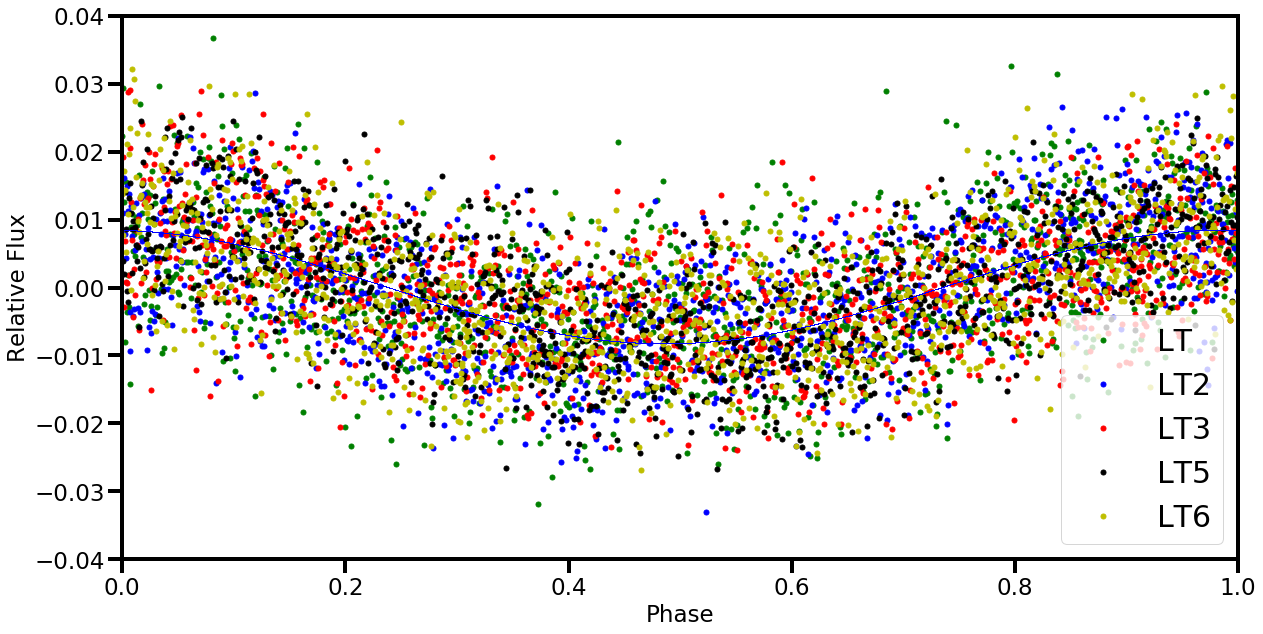

In [233]:
from pylab import *
rc('axes', linewidth=4)
f,ax = plt.subplots(1,1,gridspec_kw={'hspace': 0., 'wspace': 0.}, facecolor='w', figsize=(20,10))
ax.plot(phasesLTMean, fluxLTMean, c='g', marker='o', ms=5, label='LT', ls='')
ax.plot(phasesLTMean2, fluxLTMean2, c='b', marker='o', ms=5, label='LT2', ls='')
ax.plot(phasesLTMean3, fluxLTMean3, c='r', marker='o', ms=5, label='LT3', ls='')

#ax.plot(phasesLTMean4, fluxLTMean4, c='k', marker='o', ms=5, label='LT4', ls='')
ax.plot(phasesLTMean5, fluxLTMean5, c='k', marker='o', ms=5, label='LT5', ls='')
ax.plot(phasesLTMean6, fluxLTMean6, c='y', marker='o', ms=5, label='LT6', ls='')
ppointsmodel = foldMeth(xpointsmodel,0.08029870250017346)
ax.plot(ppointsmodel,ypointsmodel,'b,')
ax.legend(prop={'size': 30})
ax.set_xlabel("Phase", fontsize=23)
ax.set_ylabel('Relative Flux', fontsize=23)
#ax.xaxis.set_label_coords(1.0, -0.1)
ax.set_xlim(0,1)
#ax2.set_xlim(6250,7200)

#ax.set_ylim(0.9,1.12)
ax.set_ylim(-0.04,0.04)


#ax.yaxis.tick_left()
#ax.tick_params(labelright='off')
#ax2.tick_params(labelright='on')
#ax2.yaxis.tick_right()
#ax2.yaxis.set_label_position("right")


#ax.set_yticks(np.arange(0.9, 1.12, 0.05))
#ax2.set_yticks(np.arange(0.9, 1.12, 0.05))
ax.xaxis.set_minor_locator(AutoMinorLocator())
#ax2.xaxis.set_minor_locator(AutoMinorLocator())
#ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(which='both', width=4)
ax.tick_params(which='major', length=14)
#ax.tick_params(which='minor', length=8)
#ax2.tick_params(which='both', width=4)
#ax2.tick_params(which='major', length=14)
#ax2.tick_params(which='minor', length=8)
ax.tick_params(labelsize=23)
#ax2.tick_params(labelsize=23)


#plt.savefig('GD356_LT&TESS.pdf') 
#plt.show()

In [241]:
timeLT6

0       2070.445402
1       2070.445471
2       2070.445541
3       2070.445611
4       2070.445681
           ...     
1163    2070.526634
1164    2070.526704
1165    2070.526774
1166    2070.526844
1167    2070.526914
Name: JD_UTC, Length: 1168, dtype: float64

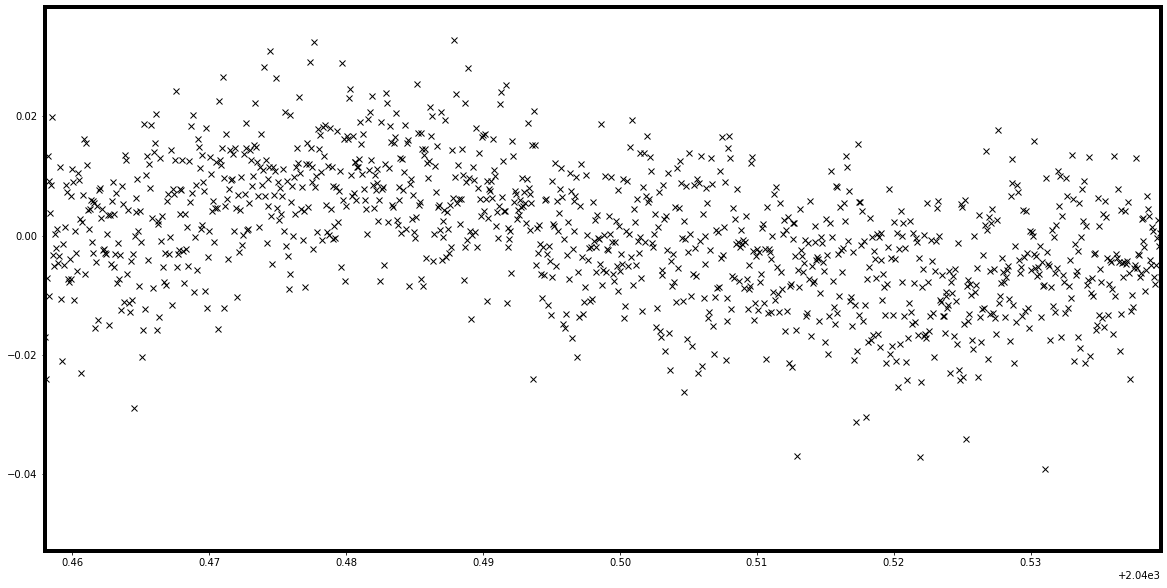

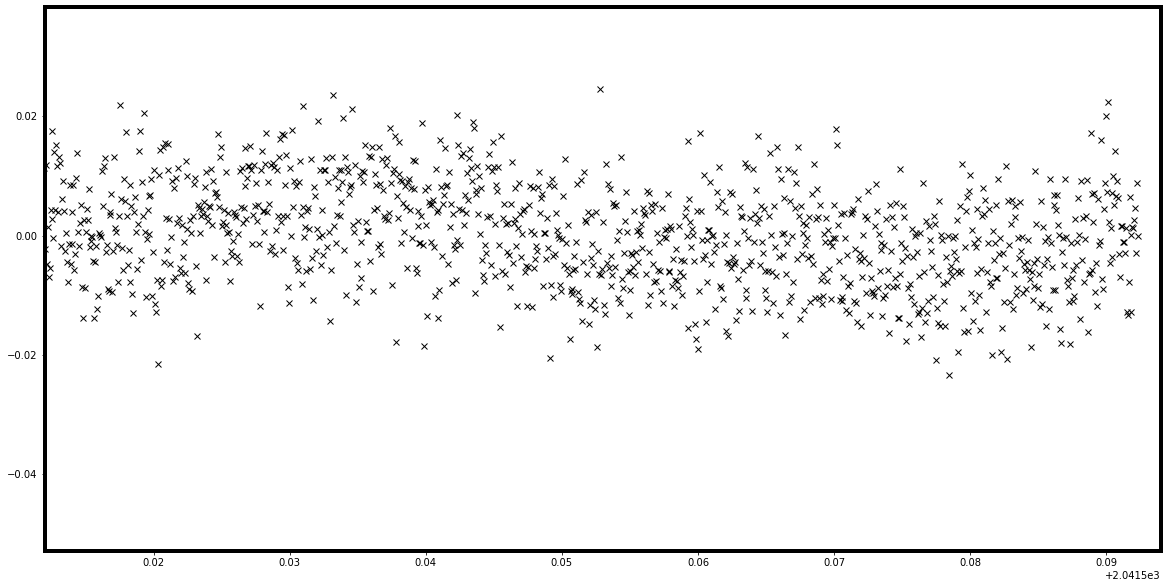

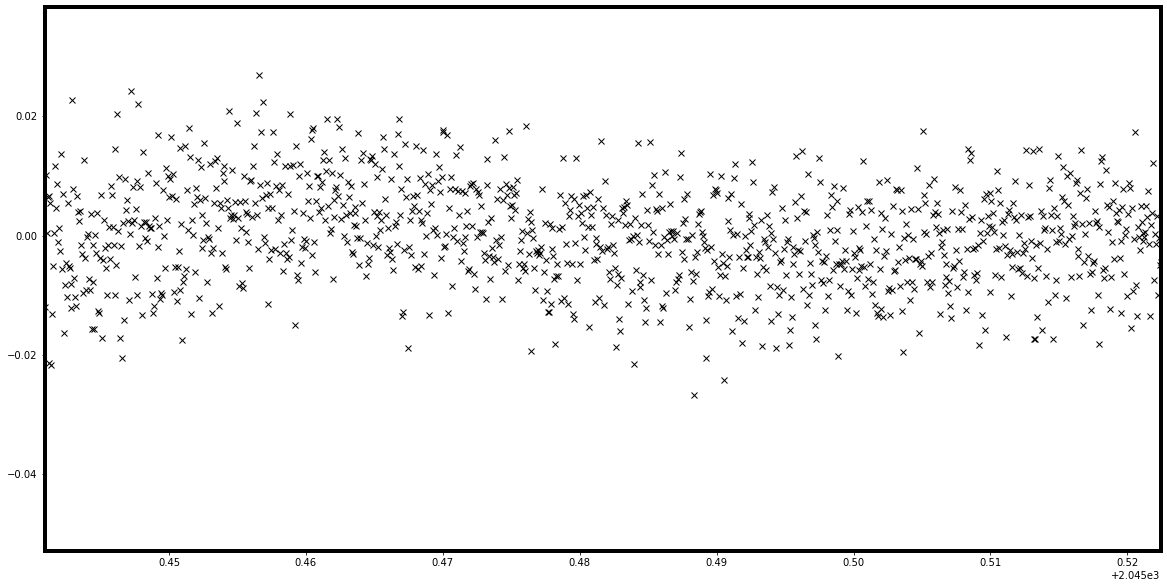

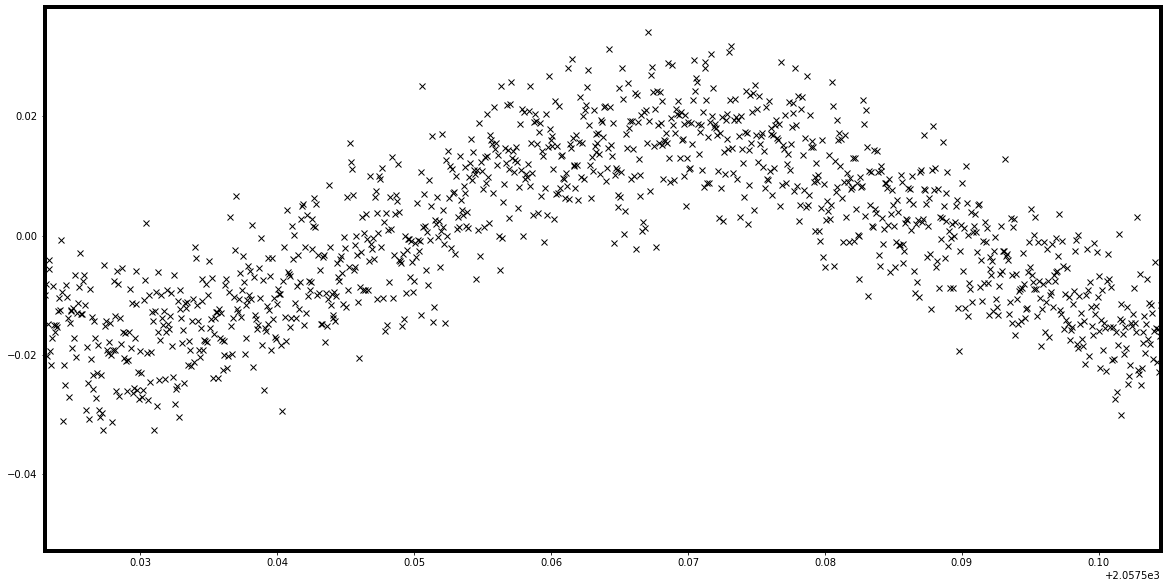

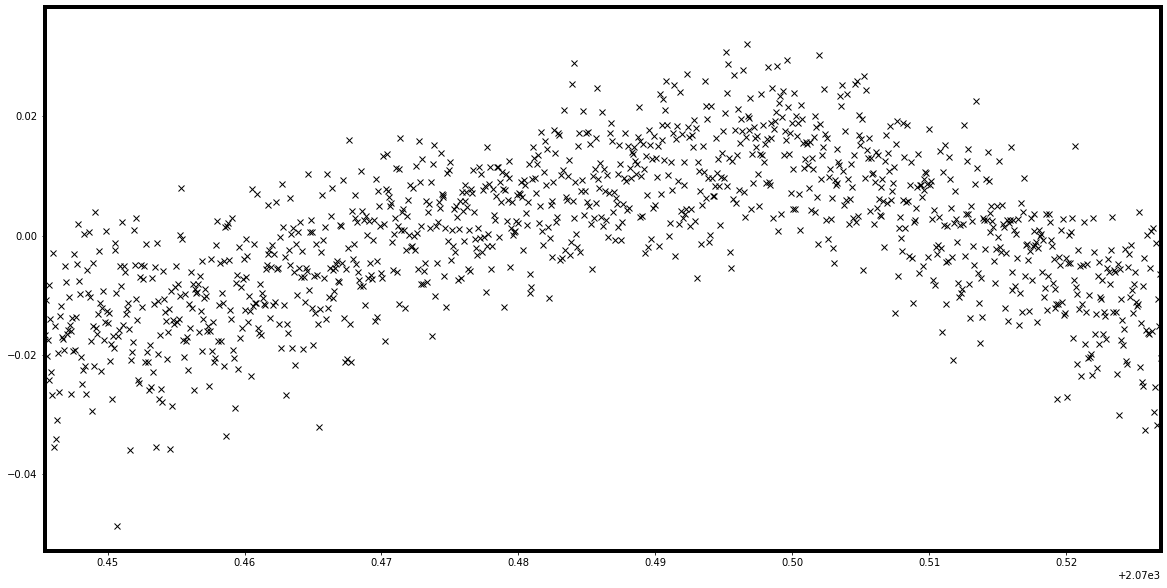

In [242]:
dataLT = pd.read_csv('mes2.csv', delimiter=',')
timeLT = dataLT['BJD_TDB']-2457000
revFluxLT = dataLT['rel_flux_T1']
revFluxLT = (revFluxLT/np.mean(revFluxLT))-1



dataLT2 = pd.read_csv('LT/2/Measurements.xls', delimiter='\t')
timeLT2 = dataLT2['BJD_TDB']-2457000
revFluxLT2 = dataLT2['rel_flux_T1']
revFluxLT2 = (revFluxLT2/np.mean(revFluxLT2))-1




dataLT3 = pd.read_csv('LT/3/Measurements031020.xls', delimiter='\t')
timeLT3 = dataLT3['JD_UTC']-2457000
revFluxLT3 = dataLT3['rel_flux_T1']
revFluxLT3 = (revFluxLT3/np.mean(revFluxLT3))-1






dataLT4 = pd.read_csv('LT/4/aligned/Measurements.xls', delimiter='\t')
timeLT4 = dataLT4['JD_UTC']-2457000
revFluxLT4 = dataLT4['rel_flux_T1']
revFluxLT4 = (revFluxLT4/np.mean(revFluxLT4))-1


dataLT5 = pd.read_csv('LT/5/Measurements.xls', delimiter='\t')
timeLT5 = dataLT5['JD_UTC']-2457000
revFluxLT5 = dataLT5['rel_flux_T1']
revFluxLT5 = (revFluxLT5/np.mean(revFluxLT5))-1


dataLT6 = pd.read_csv('LT/6/Measurements.xls', delimiter='\t')
timeLT6 = dataLT6['JD_UTC']-2457000
revFluxLT6 = dataLT6['rel_flux_T1']
revFluxLT6 = (revFluxLT6/np.mean(revFluxLT6))-1



LTFluxes = np.append(fluxLTMean,fluxLTMean2)
LTFluxes = np.append(LTFluxes,fluxLTMean3)
LTFluxes = np.append(LTFluxes,fluxLTMean5)
LTFluxes = np.append(LTFluxes,fluxLTMean6)

LTTimes = np.append(phasesLTMean,phasesLTMean2)
LTTimes = np.append(LTTimes,phasesLTMean3)
LTTimes = np.append(LTTimes,phasesLTMean5)
LTTimes = np.append(LTTimes,phasesLTMean6)

#LTPhases = foldMeth(LTTimes,0.08029870250017346)
#sortIndi = np.argsort(LTPhases)
#LTPhases = LTPhases[sortIndi]
#LTFluxes = LTFluxes[sortIndi]


#ppointsmodel = foldMeth(xpointsmodel,0.08029870250017346)
#sortIndi = np.argsort(ppointsmodel)
#ppointsmodel = ppointsmodel[sortIndi]
#ypointsmodel = ypointsmodel[sortIndi]


#ppointsmodel = foldMeth(xpointsmodel,0.08029870250017346)
#sortIndi = np.argsort(ppointsmodel)
#ppointsmodel = ppointsmodel[sortIndi]
#ypointsmodel = ypointsmodel[sortIndi]
residuals = ypointsmodel - LTFluxes
plt.figure(figsize=(20,10))
plt.plot(xpointsmodel,residuals, 'kx')
plt.xlim(2040.457975,2040.539489)
plt.show()
plt.figure(figsize=(20,10))
plt.plot(xpointsmodel,residuals, 'kx')
plt.xlim(2041.512,2041.594)
plt.show()
plt.figure(figsize=(20,10))
plt.plot(xpointsmodel,residuals, 'kx')
plt.xlim(2045.440924,2045.522436)
plt.show()
plt.figure(figsize=(20,10))
plt.plot(xpointsmodel,residuals, 'kx')
plt.xlim(2057.523007,2057.604518)
plt.show()
plt.figure(figsize=(20,10))
plt.plot(xpointsmodel,residuals, 'kx')
plt.xlim(2070.445402,2070.526914)
plt.show()

In [10]:
dataLT = pd.read_csv('mes2.csv', delimiter=',')
timeLT = dataLT['BJD_TDB']
revFluxLT = dataLT['rel_flux_T1']
phasesLT = foldMeth(timeLT,0.08029870250017346)
sortIndi = np.argsort(phasesLT)
phasesLTs = phasesLT[sortIndi]
revFluxLTs = revFluxLT[sortIndi]
dataLT = pd.read_csv('mes2.csv', delimiter=',')
timeLT = dataLT['BJD_TDB']
revFluxLT = dataLT['rel_flux_T1']
timeLTMean = np.nanmean(np.pad(timeLT.astype(float), (0, 10 - timeLT.size%10), mode='constant', constant_values=np.NaN).reshape(-1, 10), axis=1)
fluxLTMean = np.nanmean(np.pad(revFluxLT.astype(float), (0, 10 - revFluxLT.size%10), mode='constant', constant_values=np.NaN).reshape(-1, 10), axis=1)
phasesLTMean = foldMeth(timeLTMean,0.08029870250017346)
sortIndi = np.argsort(phasesLTMean)
phasesLTMean = phasesLTMean[sortIndi]
fluxLTMean = fluxLTMean[sortIndi]


dataLT2 = pd.read_csv('LT/2/Measurements.xls', delimiter='\t')
timeLT2 = dataLT2['BJD_TDB']
revFluxLT2 = dataLT2['rel_flux_T1']
timeLTMean2 = np.nanmean(np.pad(timeLT2.astype(float), (0, 10 - timeLT2.size%10), mode='constant', constant_values=np.NaN).reshape(-1, 10), axis=1)
fluxLTMean2 = np.nanmean(np.pad(revFluxLT2.astype(float), (0, 10 - revFluxLT2.size%10), mode='constant', constant_values=np.NaN).reshape(-1, 10), axis=1)
phasesLTMean2 = foldMeth(timeLTMean2,0.08029870250017346)
sortIndi = np.argsort(phasesLTMean2)
phasesLTMean2 = phasesLTMean2[sortIndi]
fluxLTMean2 = fluxLTMean2[sortIndi]




dataLT3 = pd.read_csv('LT/3/Measurements031020.xls', delimiter='\t')
timeLT3 = dataLT3['JD_UTC']
revFluxLT3 = dataLT3['rel_flux_T1']
timeLTMean3 = np.nanmean(np.pad(timeLT3.astype(float), (0, 10 - timeLT3.size%10), mode='constant', constant_values=np.NaN).reshape(-1, 10), axis=1)
fluxLTMean3 = np.nanmean(np.pad(revFluxLT3.astype(float), (0, 10 - revFluxLT3.size%10), mode='constant', constant_values=np.NaN).reshape(-1, 10), axis=1)
phasesLTMean3 = foldMeth(timeLTMean3,0.08029870250017346)
sortIndi = np.argsort(phasesLTMean3)
phasesLTMean3 = phasesLTMean3[sortIndi]
fluxLTMean3 = fluxLTMean3[sortIndi]





dataLT4 = pd.read_csv('LT/4/aligned/Measurements.xls', delimiter='\t')
timeLT4 = dataLT4['JD_UTC']
revFluxLT4 = dataLT4['rel_flux_T1']
timeLTMean4 = np.nanmean(np.pad(timeLT4.astype(float), (0, 10 - timeLT4.size%10), mode='constant', constant_values=np.NaN).reshape(-1, 10), axis=1)
fluxLTMean4 = np.nanmean(np.pad(revFluxLT4.astype(float), (0, 10 - revFluxLT4.size%10), mode='constant', constant_values=np.NaN).reshape(-1, 10), axis=1)
phasesLTMean4 = foldMeth(timeLTMean4,0.08029870250017346)
sortIndi = np.argsort(phasesLTMean4)
phasesLTMean4 = phasesLTMean4[sortIndi]
fluxLTMean4 = fluxLTMean4[sortIndi]


dataLT5 = pd.read_csv('LT/5/Measurements.xls', delimiter='\t')
timeLT5 = dataLT5['JD_UTC']
revFluxLT5 = dataLT5['rel_flux_T1']
timeLTMean5 = np.nanmean(np.pad(timeLT5.astype(float), (0, 10 - timeLT5.size%10), mode='constant', constant_values=np.NaN).reshape(-1, 10), axis=1)
fluxLTMean5 = np.nanmean(np.pad(revFluxLT5.astype(float), (0, 10 - revFluxLT5.size%10), mode='constant', constant_values=np.NaN).reshape(-1, 10), axis=1)
phasesLTMean5 = foldMeth(timeLTMean5,0.08029870250017346)
sortIndi = np.argsort(phasesLTMean5)
phasesLTMean5 = phasesLTMean5[sortIndi]
fluxLTMean5 = fluxLTMean5[sortIndi]

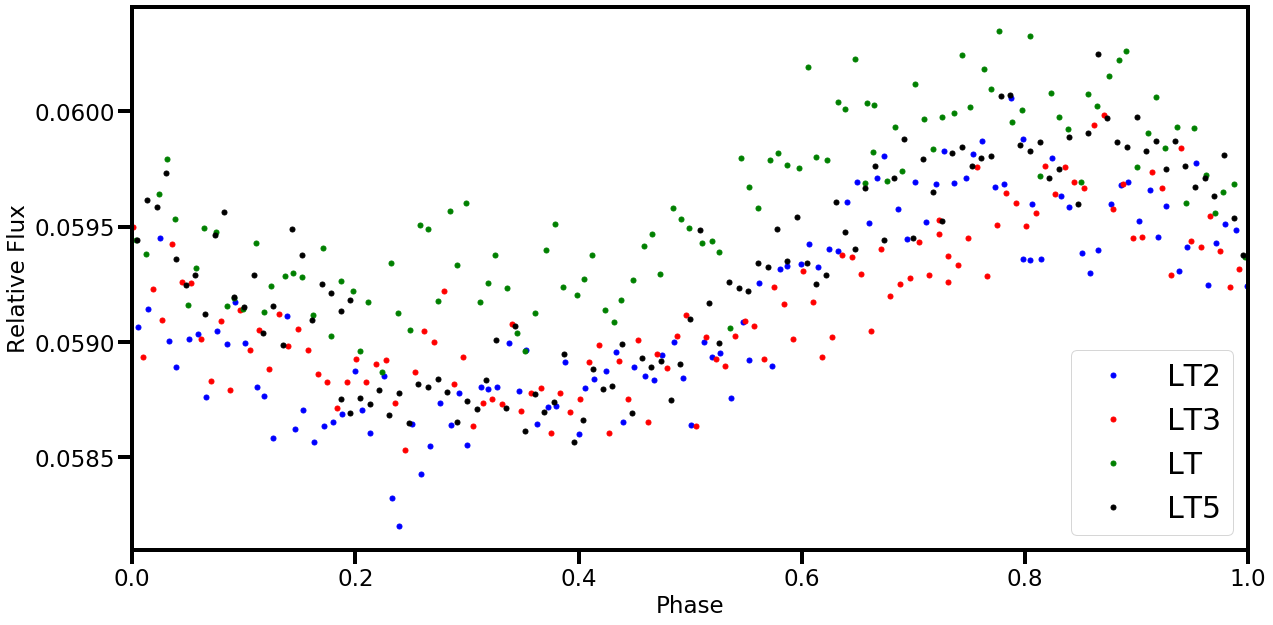

In [12]:
from pylab import *
rc('axes', linewidth=4)
f,ax = plt.subplots(1,1,gridspec_kw={'hspace': 0., 'wspace': 0.}, facecolor='w', figsize=(20,10))

ax.plot(phasesLTMean2, fluxLTMean2, c='b', marker='o', ms=5, label='LT2', ls='')
ax.plot(phasesLTMean3, fluxLTMean3, c='r', marker='o', ms=5, label='LT3', ls='')
ax.plot(phasesLTMean, fluxLTMean, c='g', marker='o', ms=5, label='LT', ls='')
#ax.plot(phasesLTMean4, fluxLTMean4, c='k', marker='o', ms=5, label='LT4', ls='')
ax.plot(phasesLTMean5, fluxLTMean5, c='k', marker='o', ms=5, label='LT5', ls='')


ax.legend(prop={'size': 30})
ax.set_xlabel("Phase", fontsize=23)
ax.set_ylabel('Relative Flux', fontsize=23)
#ax.xaxis.set_label_coords(1.0, -0.1)
ax.set_xlim(0,1)
#ax2.set_xlim(6250,7200)

#ax.set_ylim(0.9,1.12)
############ax.set_ylim(-0.05,0.05)


#ax.yaxis.tick_left()
#ax.tick_params(labelright='off')
#ax2.tick_params(labelright='on')
#ax2.yaxis.tick_right()
#ax2.yaxis.set_label_position("right")


#ax.set_yticks(np.arange(0.9, 1.12, 0.05))
#ax2.set_yticks(np.arange(0.9, 1.12, 0.05))
ax.xaxis.set_minor_locator(AutoMinorLocator())
#ax2.xaxis.set_minor_locator(AutoMinorLocator())
#ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(which='both', width=4)
ax.tick_params(which='major', length=14)
#ax.tick_params(which='minor', length=8)
#ax2.tick_params(which='both', width=4)
#ax2.tick_params(which='major', length=14)
#ax2.tick_params(which='minor', length=8)
ax.tick_params(labelsize=23)
#ax2.tick_params(labelsize=23)


#plt.savefig('GD356_LT&TESS.pdf') 
#plt.show()

In [13]:
dataLT = pd.read_csv('mes2.csv', delimiter=',')
timeLT = dataLT['BJD_TDB']
revFluxLT = dataLT['rel_flux_T1']
phasesLT = foldMeth(timeLT,0.08029870250017346)
sortIndi = np.argsort(phasesLT)
phasesLTs = phasesLT[sortIndi]
revFluxLTs = revFluxLT[sortIndi]
dataLT = pd.read_csv('mes2.csv', delimiter=',')
timeLT = dataLT['BJD_TDB']
revFluxLT = dataLT['rel_flux_T1']
timeLTMean = timeLT
fluxLTMean = revFluxLT
phasesLTMean = foldMeth(timeLTMean,0.08029870250017346)
sortIndi = np.argsort(phasesLTMean)
phasesLTMean = phasesLTMean[sortIndi]
fluxLTMean = fluxLTMean[sortIndi]


dataLT2 = pd.read_csv('LT/2/Measurements.xls', delimiter='\t')
timeLT2 = dataLT2['BJD_TDB']
revFluxLT2 = dataLT2['rel_flux_T1']
timeLTMean2 = timeLT2
fluxLTMean2 = revFluxLT2
phasesLTMean2 = foldMeth(timeLTMean2,0.08029870250017346)
sortIndi = np.argsort(phasesLTMean2)
phasesLTMean2 = phasesLTMean2[sortIndi]
fluxLTMean2 = fluxLTMean2[sortIndi]




dataLT3 = pd.read_csv('LT/3/Measurements031020.xls', delimiter='\t')
timeLT3 = dataLT3['JD_UTC']
revFluxLT3 = dataLT3['rel_flux_T1']
timeLTMean3 = timeLT3
fluxLTMean3 = revFluxLT3
phasesLTMean3 = foldMeth(timeLTMean3,0.08029870250017346)
sortIndi = np.argsort(phasesLTMean3)
phasesLTMean3 = phasesLTMean3[sortIndi]
fluxLTMean3 = fluxLTMean3[sortIndi]





dataLT4 = pd.read_csv('LT/4/aligned/Measurements.xls', delimiter='\t')
timeLT4 = dataLT4['JD_UTC']
revFluxLT4 = dataLT4['rel_flux_T1']
timeLTMean4 = timeLTMean4
fluxLTMean4 = revFluxLT4
phasesLTMean4 = foldMeth(timeLTMean4,0.08029870250017346)
sortIndi = np.argsort(phasesLTMean4)
phasesLTMean4 = phasesLTMean4[sortIndi]
fluxLTMean4 = fluxLTMean4[sortIndi]


dataLT5 = pd.read_csv('LT/5/Measurements.xls', delimiter='\t')
timeLT5 = dataLT5['JD_UTC']
revFluxLT5 = dataLT5['rel_flux_T1']
timeLTMean5 = timeLT5
fluxLTMean5 = revFluxLT5
phasesLTMean5 = foldMeth(timeLTMean5,0.08029870250017346)
sortIndi = np.argsort(phasesLTMean5)
phasesLTMean5 = phasesLTMean5[sortIndi]
fluxLTMean5 = fluxLTMean5[sortIndi]

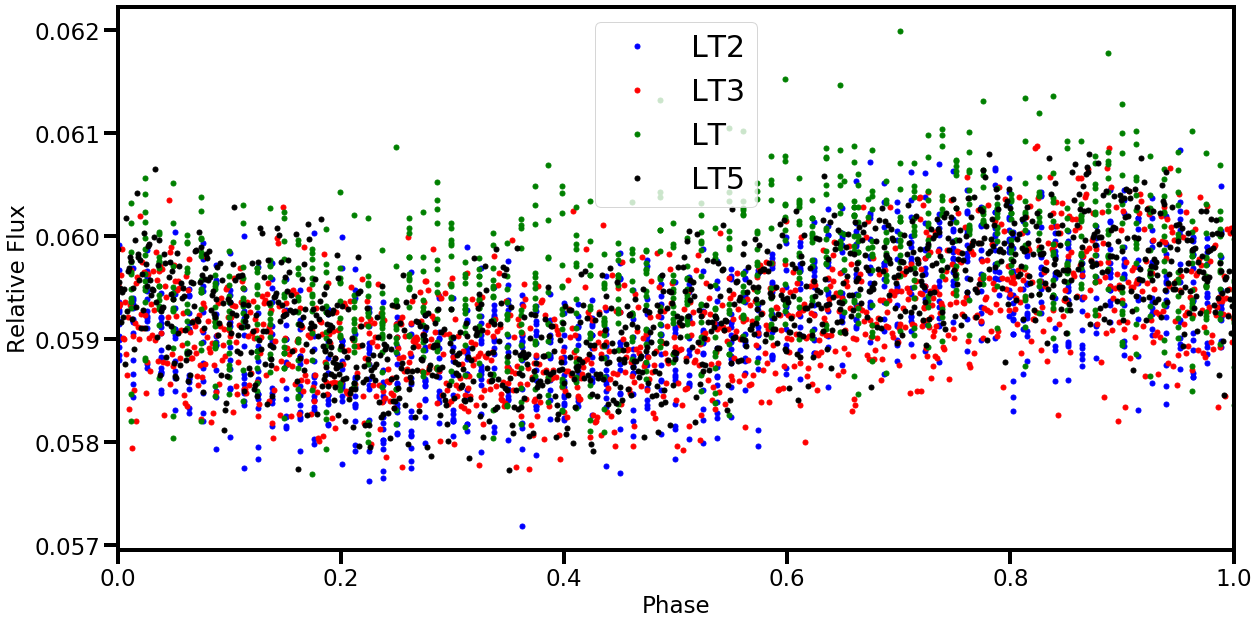

In [14]:
from pylab import *
rc('axes', linewidth=4)
f,ax = plt.subplots(1,1,gridspec_kw={'hspace': 0., 'wspace': 0.}, facecolor='w', figsize=(20,10))

ax.plot(phasesLTMean2, fluxLTMean2, c='b', marker='o', ms=5, label='LT2', ls='')
ax.plot(phasesLTMean3, fluxLTMean3, c='r', marker='o', ms=5, label='LT3', ls='')
ax.plot(phasesLTMean, fluxLTMean, c='g', marker='o', ms=5, label='LT', ls='')
#ax.plot(phasesLTMean4, fluxLTMean4, c='k', marker='o', ms=5, label='LT4', ls='')
ax.plot(phasesLTMean5, fluxLTMean5, c='k', marker='o', ms=5, label='LT5', ls='')


ax.legend(prop={'size': 30})
ax.set_xlabel("Phase", fontsize=23)
ax.set_ylabel('Relative Flux', fontsize=23)
#ax.xaxis.set_label_coords(1.0, -0.1)
ax.set_xlim(0,1)
#ax2.set_xlim(6250,7200)

#ax.set_ylim(0.9,1.12)
############ax.set_ylim(-0.05,0.05)


#ax.yaxis.tick_left()
#ax.tick_params(labelright='off')
#ax2.tick_params(labelright='on')
#ax2.yaxis.tick_right()
#ax2.yaxis.set_label_position("right")


#ax.set_yticks(np.arange(0.9, 1.12, 0.05))
#ax2.set_yticks(np.arange(0.9, 1.12, 0.05))
ax.xaxis.set_minor_locator(AutoMinorLocator())
#ax2.xaxis.set_minor_locator(AutoMinorLocator())
#ax.yaxis.set_minor_locator(AutoMinorLocator())
ax.tick_params(which='both', width=4)
ax.tick_params(which='major', length=14)
#ax.tick_params(which='minor', length=8)
#ax2.tick_params(which='both', width=4)
#ax2.tick_params(which='major', length=14)
#ax2.tick_params(which='minor', length=8)
ax.tick_params(labelsize=23)
#ax2.tick_params(labelsize=23)


#plt.savefig('GD356_LT&TESS.pdf') 
#plt.show()